## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# information on columns/attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#observe the different feature type present in the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# More details about the dataframe/dataset.
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  284807
Columns  :  31

Features : 
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values :   0

Unique values :  
 Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal = classes[0]
fraud = classes[1]
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, normal_share, fraud, fraud_share))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

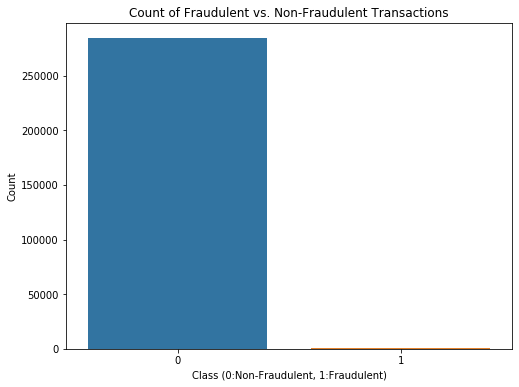

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8,6))
sns.barplot(x=classes.index, y=classes)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0, 0.5, 'Time')

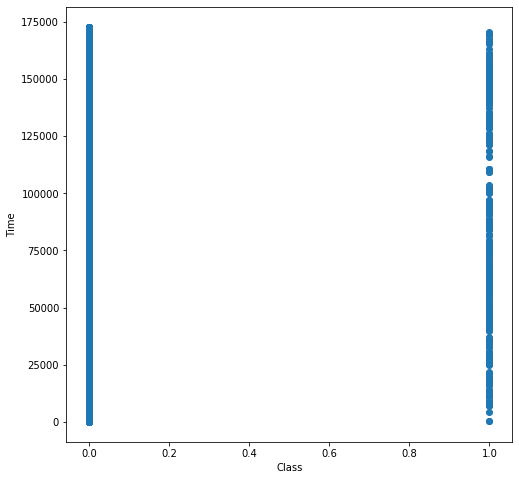

In [9]:
# Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize = (8,8))
plt.scatter(df.Class,df.Time)
plt.xlabel('Class')
plt.ylabel('Time')

Text(0, 0.5, 'Amount')

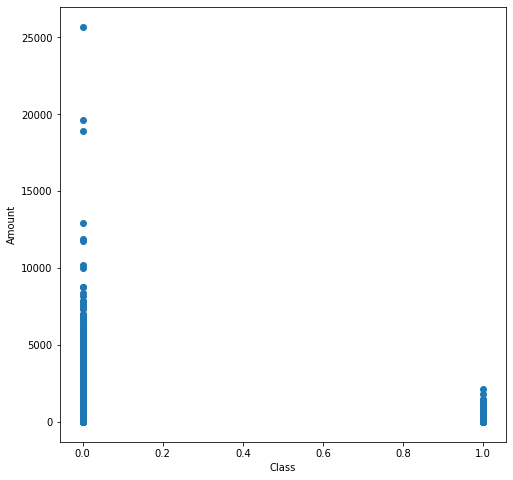

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount attribute
fig = plt.figure(figsize = (8,8))
plt.scatter(df.Class,df.Amount)
plt.xlabel('Class')
plt.ylabel('Amount')

In [11]:
# Checking corelation of all the columns
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


Text(0.5, 1, 'Heatmap of Correlation')

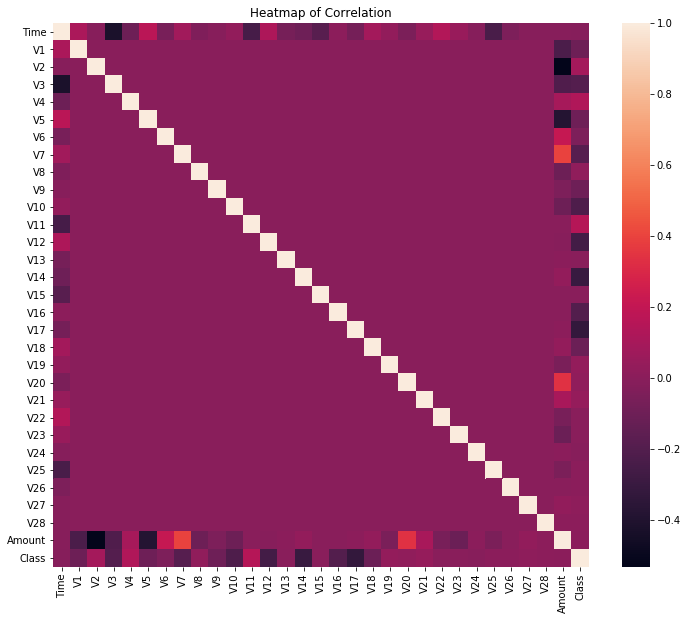

In [12]:
#heatmap of the dataframe/dataset
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

### Splitting the data into train & test data

In [13]:
y= df['Class'].values
X = df.drop(columns = ['Class'])

### Plotting the distribution of a variable

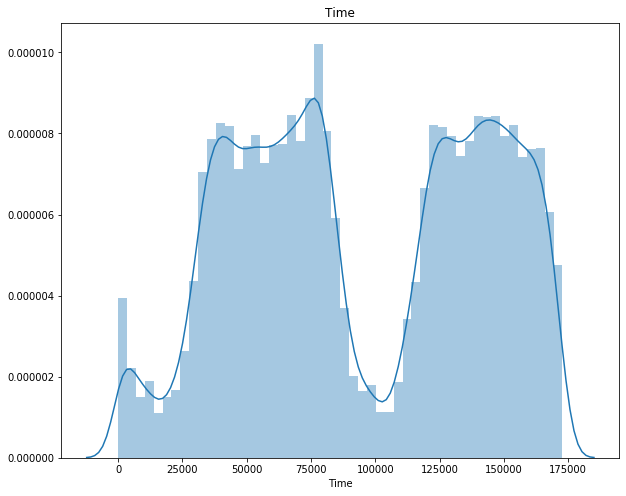

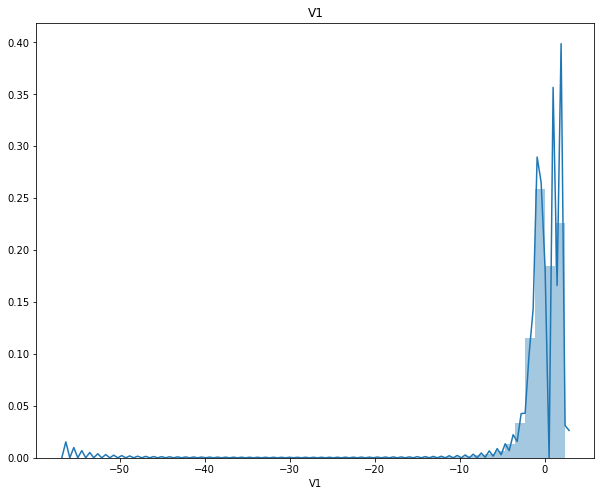

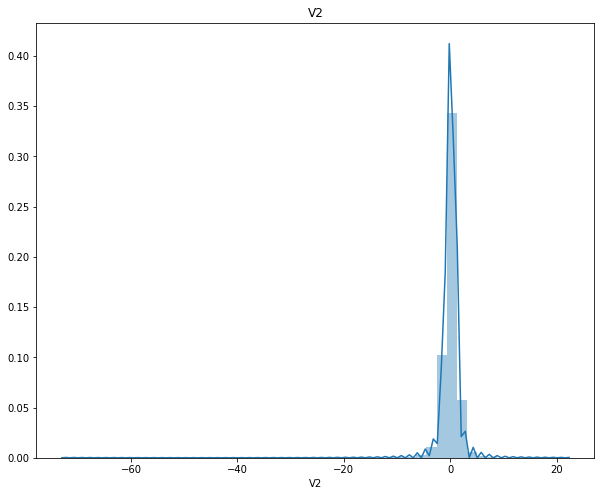

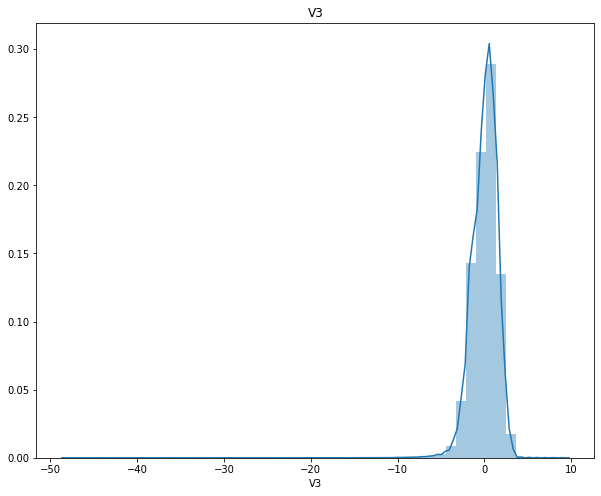

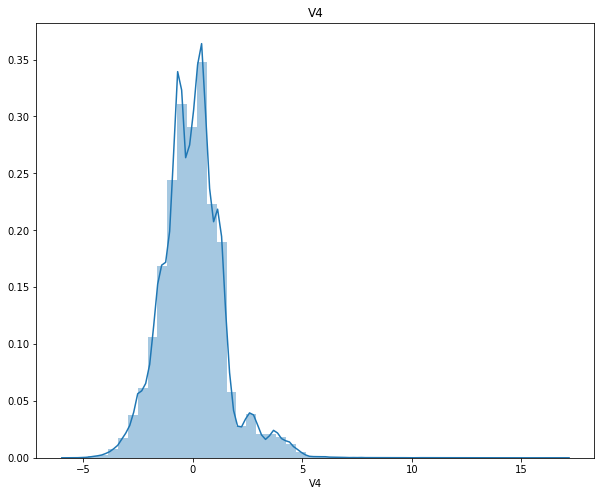

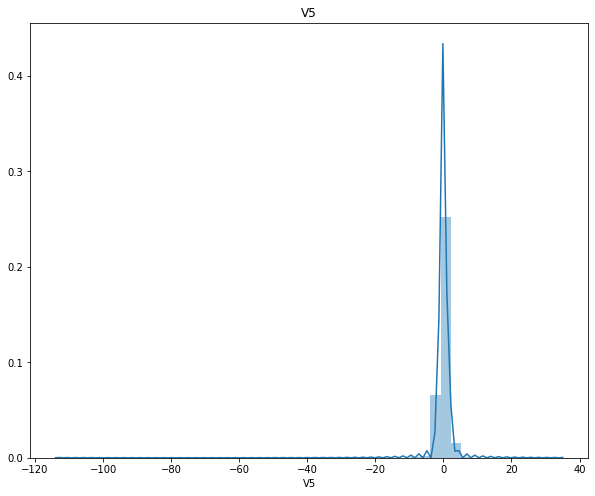

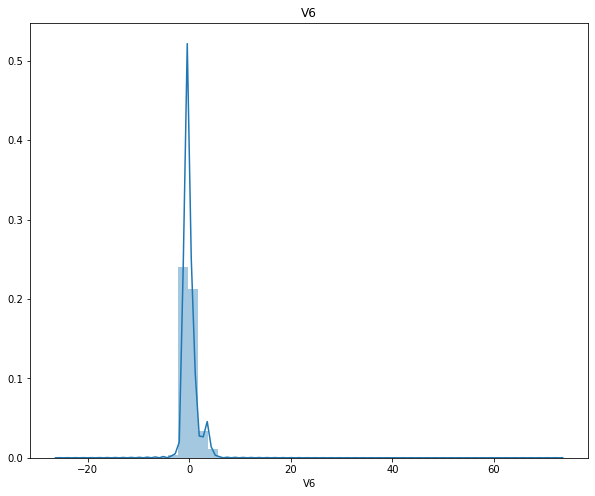

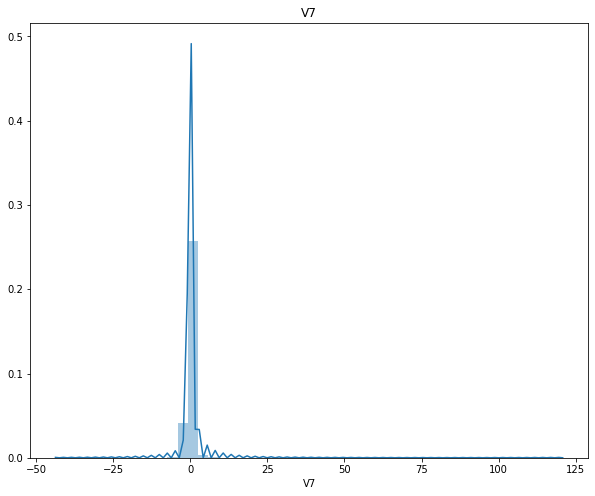

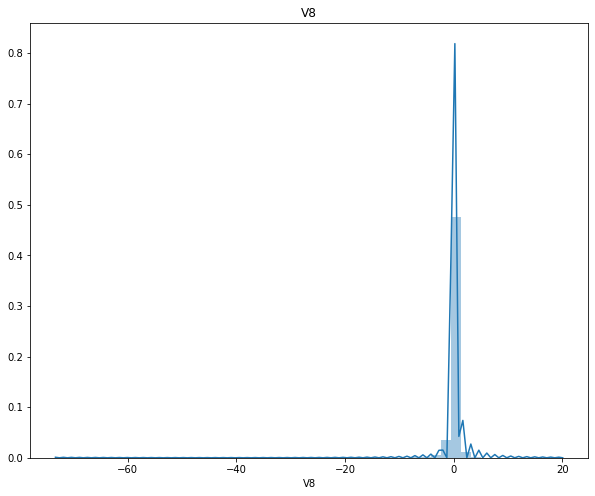

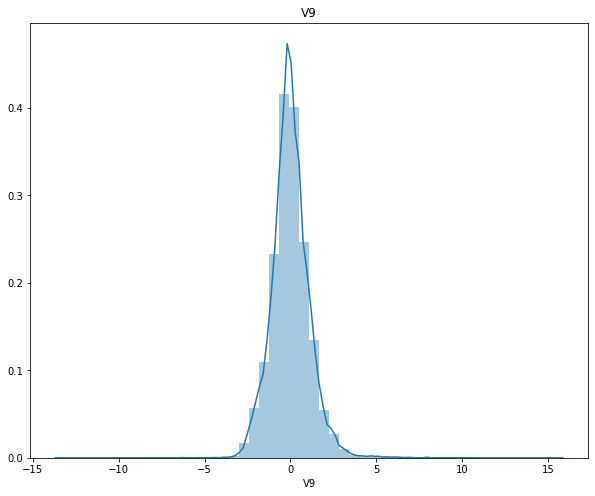

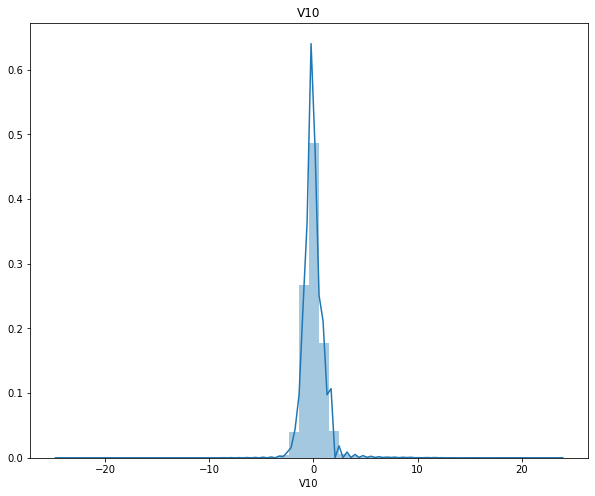

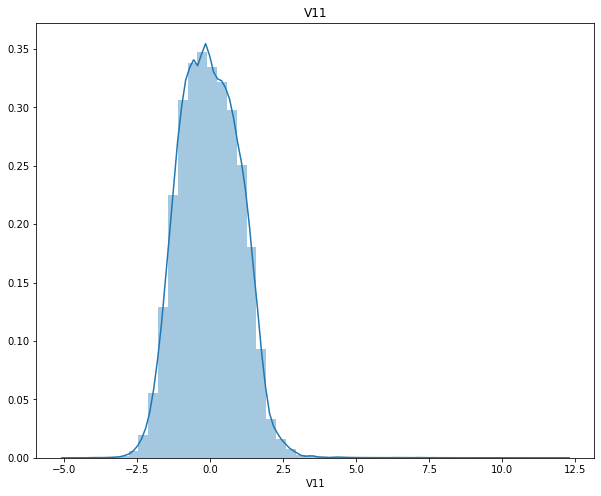

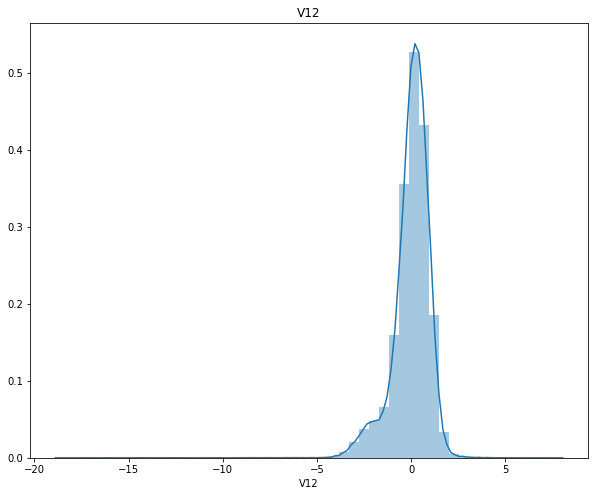

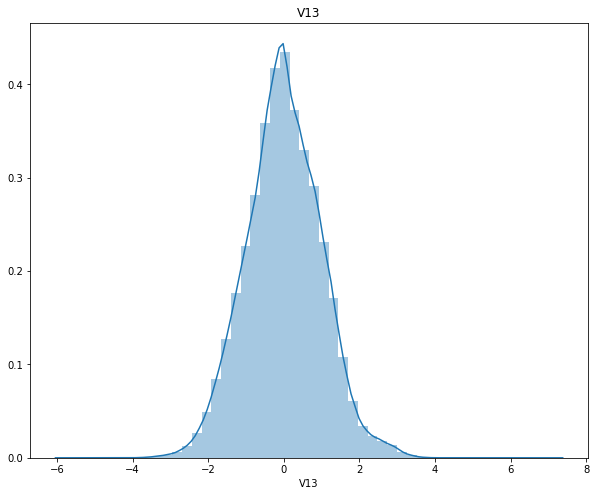

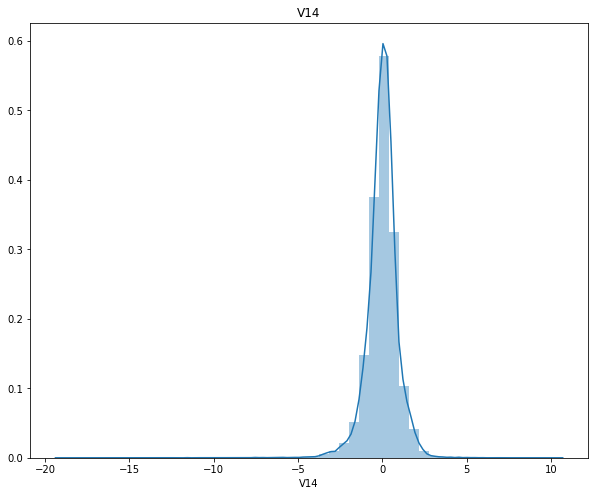

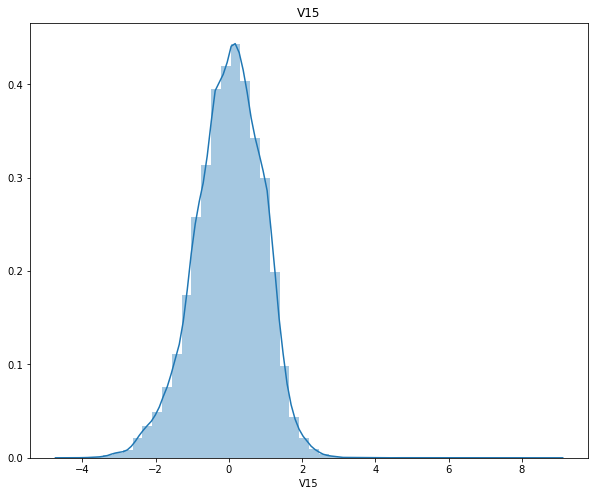

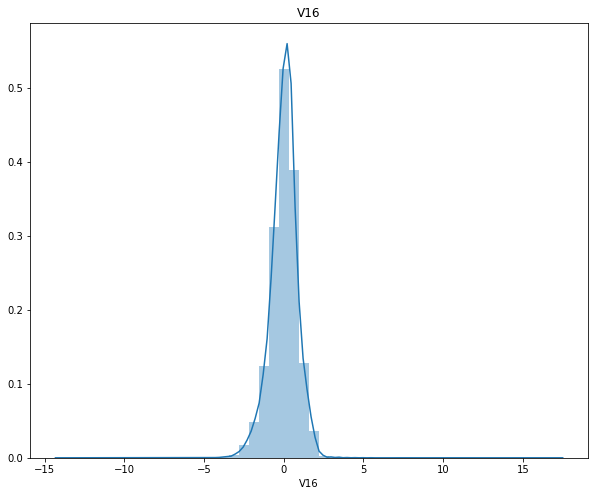

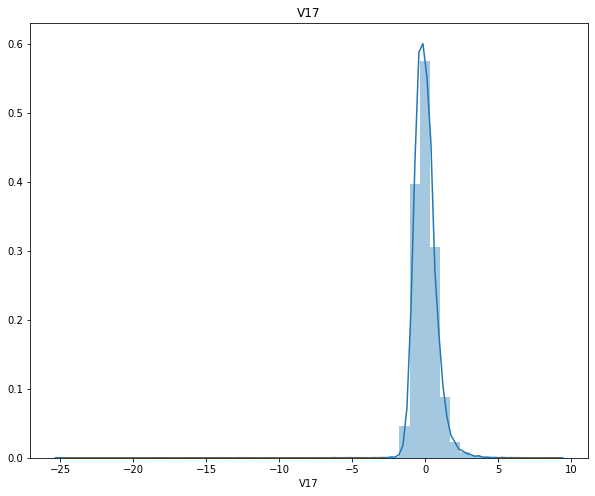

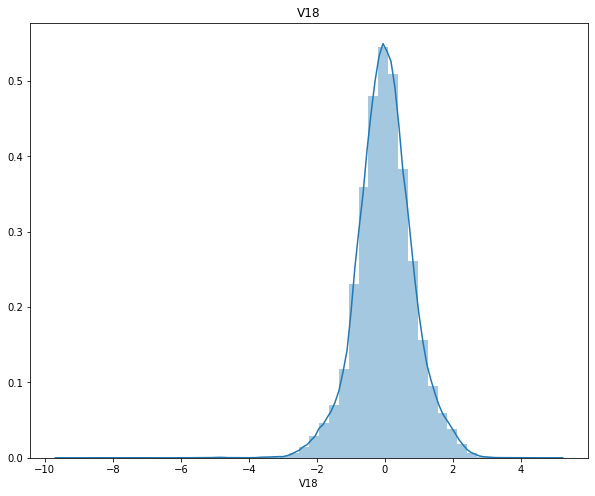

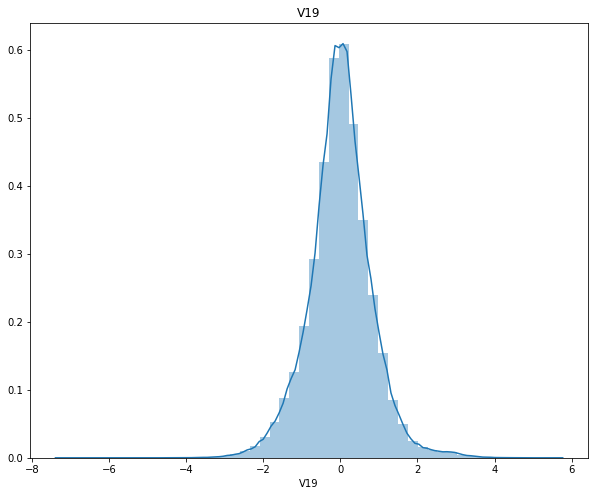

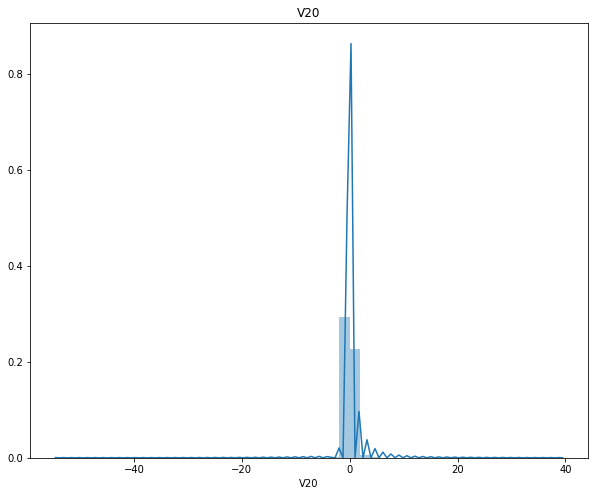

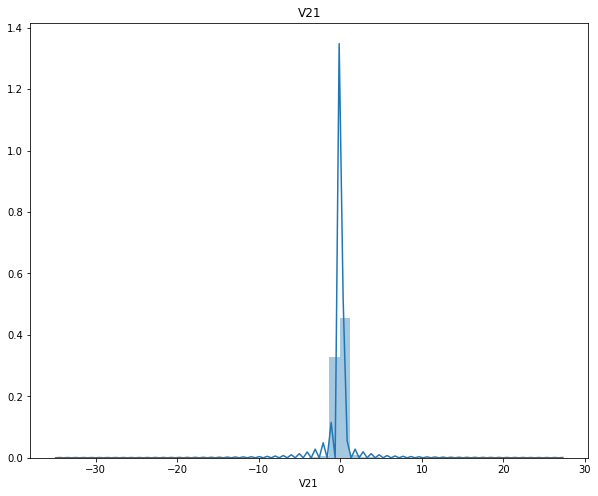

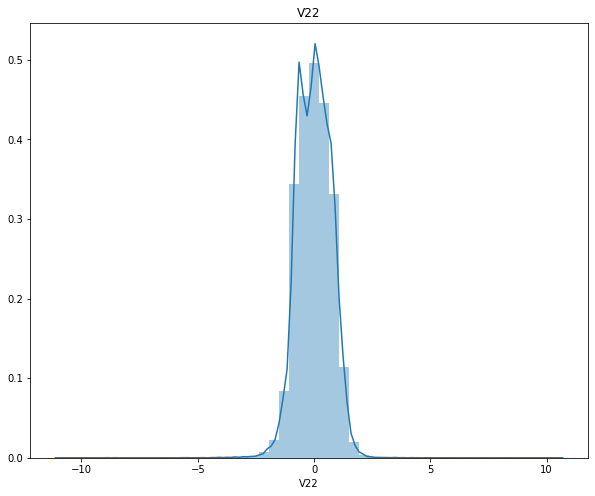

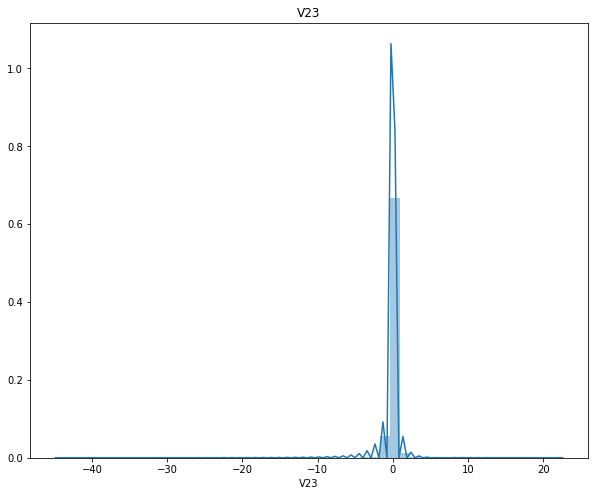

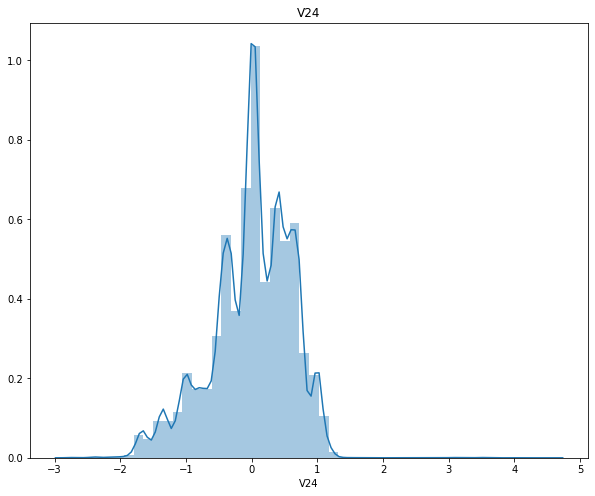

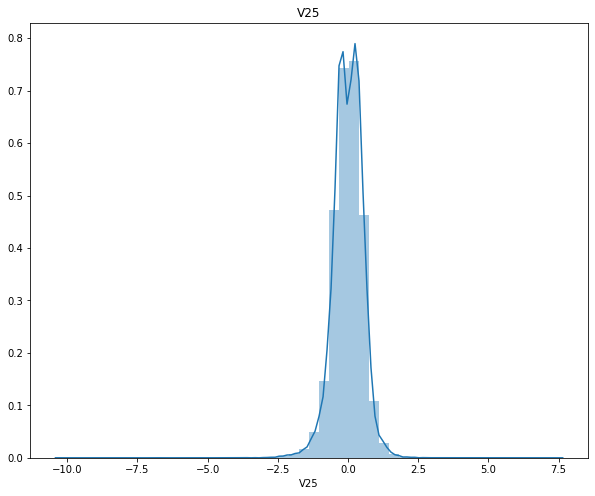

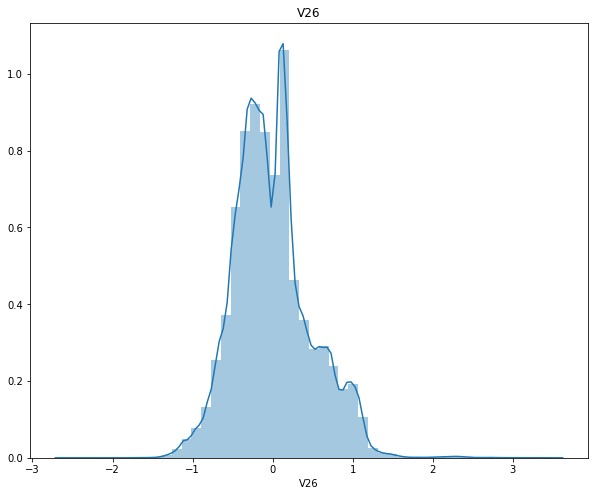

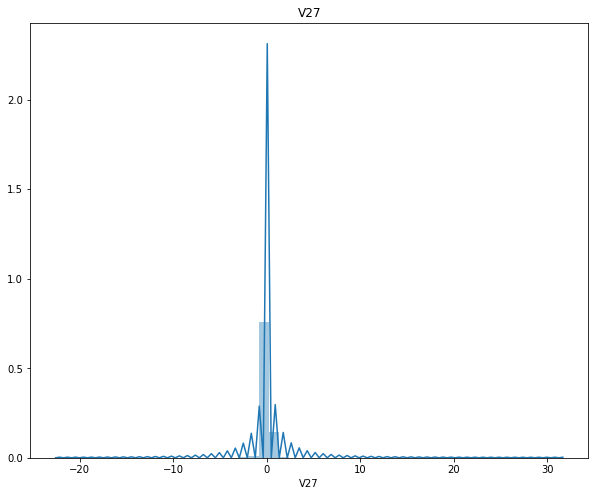

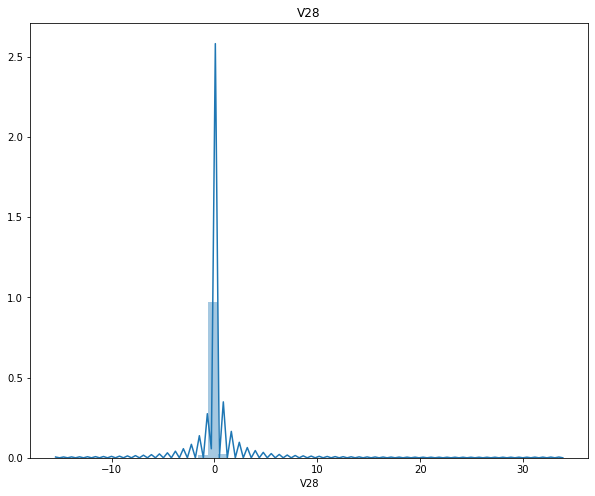

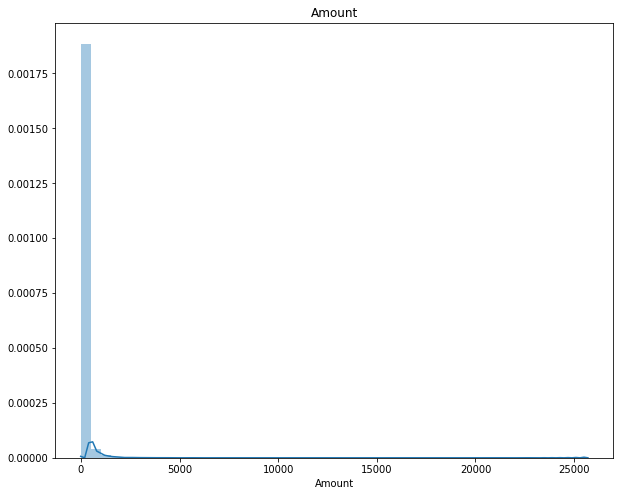

In [14]:
# plot the histogram of a variable from the dataset to see the skewness in the data.
cols = X.columns
for col in cols:
    plt.figure(figsize=(10,8))
    plt.title(col)
    sns.distplot(X[col]) 

Since, there is skewness available in the distribution, we shall be using Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian.

In [15]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
features = X.columns.values
pt = PowerTransformer(copy=False)
pt.fit(X)
X = pd.DataFrame(pt.transform(X))
X.columns = features

NameError: name 'X_pt' is not defined

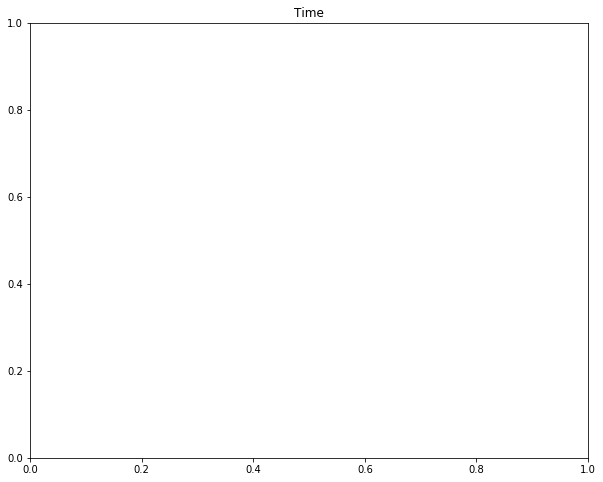

In [16]:
# plot the histogram of a variable from the dataset again to see the result 
cols = X.columns
for col in cols:
    plt.figure(figsize=(10,8))
    plt.title(col)
    sns.distplot(X_pt[col]) 

In [17]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-8.262114e-15,-1.239591e-15,2.211523e-17,-1.589602e-15,-1.250528e-15,-2.865805e-15,-1.818409e-15,-4.516672e-16,1.625306e-15,-1.121462e-15,...,-3.505498e-17,5.560020e-16,9.874022e-16,8.640738e-17,-3.422827e-16,-4.004740e-15,-9.318378e-16,5.359666e-16,1.525829e-16,5.732179e-13
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.434947e+00,-8.474209e+00,-2.371418e+01,-1.301749e+01,-5.019738e+00,-7.329386e+01,-4.255940e+01,-3.515221e+01,-2.807450e+01,-1.637021e+01,...,-6.683669e+01,-6.327021e+01,-1.331922e+01,-5.864168e+01,-3.535587e+00,-1.462784e+01,-8.024445e+00,-4.459955e+01,-6.138567e+01,-2.013010e+00
25%,-8.096432e-01,-7.229843e-01,-4.535393e-01,-7.123539e-01,-5.694044e-01,-5.092615e-01,-5.567794e-01,-4.479996e-01,-2.749846e-01,-5.609001e-01,...,-2.779494e-01,-3.024685e-01,-7.557923e-01,-2.720975e-01,-6.594300e-01,-6.344037e-01,-6.498315e-01,-1.899149e-01,-1.525768e-01,-7.509351e-01
50%,-1.427109e-01,-2.489598e-01,-4.167429e-02,-2.512616e-02,6.318167e-02,-5.108320e-02,-1.140057e-01,3.224257e-02,-5.537799e-02,6.934394e-03,...,-8.464112e-02,-2.316512e-02,-1.097852e-02,-2.948935e-02,-2.967327e-02,-6.929268e-03,-1.758425e-02,-9.972324e-03,4.673230e-02,2.710133e-02
75%,9.285190e-01,7.357771e-01,4.754402e-01,6.738369e-01,5.828420e-01,4.362457e-01,4.134314e-01,4.609974e-01,2.558749e-01,5.825380e-01,...,1.693723e-01,2.740504e-01,7.213460e-01,2.290998e-01,7.058649e-01,6.583519e-01,5.778472e-01,2.154882e-01,2.531752e-01,7.483193e-01
max,1.535312e+00,1.868337e+00,2.342550e+01,1.143255e+01,8.543672e+00,2.750233e+01,2.306058e+01,9.768921e+01,3.740342e+01,1.073049e+01,...,5.389903e+01,2.963924e+01,1.641212e+01,4.332679e+01,1.238450e+01,1.909465e+01,4.937290e+00,1.038741e+02,7.561008e+01,3.674446e+00


In [18]:
#Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [19]:
# Create Train and Test Data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
# Preserve X_test & y_test to evaluate on the test data once you build the model
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
348
144


In [21]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)

X_shapes:
 X_train: X_test:
 (199364, 30) (85443, 30) 

Y_shapes:
 Y_train: Y_test:
 (199364,) (85443,)


## Model Building
- Build different models on the imbalanced dataset and see the result

In [22]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
##Spot-Checking Algorithms

models1 = []

models1.append(('LR', LogisticRegression()))
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('CART', DecisionTreeClassifier()))
models1.append(('SVM', SVC()))
models1.append(('XGB', XGBClassifier()))
models1.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models1:
    
    Sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=Sfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.977804 (0.017075)
KNN: 0.909181 (0.032553)
CART: 0.880303 (0.038250)
SVM: 0.963904 (0.020139)
XGB: 0.980449 (0.012558)
RF: 0.950984 (0.015075)


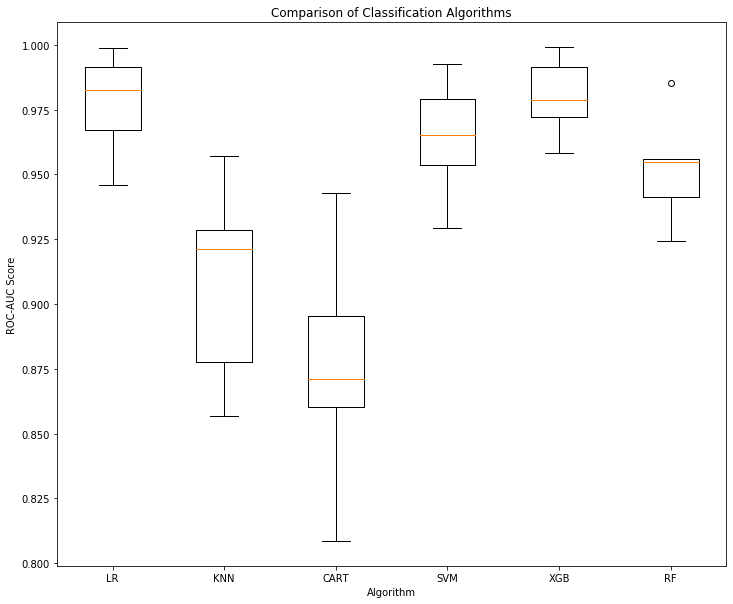

In [24]:
#Comparision in Algorithms

figure = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = figure.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

From quick analysis , it seems logistic regression and XGboost model returns good AUC score compare to others.
We will check with hyperparameter tuning if model performance can be improved.

### Building different models on the imbalanced dataset with hyperparameter tuning

##### Logistic Regression with hyperparameter c value and penalty score.

In [25]:
# Creating logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [26]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [27]:
# Create grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model_lr, hyperparameters, cv=5, n_jobs=4,verbose=0)

In [28]:
# Fit grid search
lr_model = clf.fit(X_train, y_train)

In [29]:
# View best hyperparameters
print('Best Penalty:', lr_model.best_estimator_.get_params()['penalty'])
print('Best C:', lr_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1291.5496650148827


In [30]:
from sklearn import metrics
#prediction on train data
prediction_train_logr = lr_model.predict(X_train)
print('Logistic Regression on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_logr)))

Logistic Regression on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.87      0.62      0.73       348

    accuracy                           1.00    199364
   macro avg       0.94      0.81      0.86    199364
weighted avg       1.00      1.00      1.00    199364




In [31]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

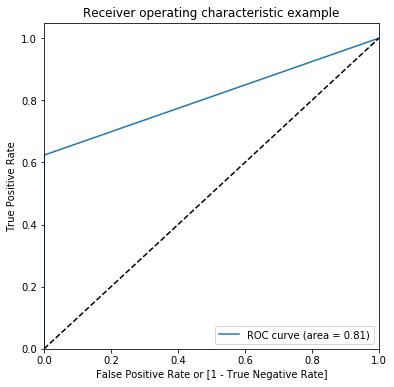

(array([0.00000000e+00, 1.60791092e-04, 1.00000000e+00]),
 array([0.        , 0.62356322, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [32]:
draw_roc(y_train, prediction_train_logr)

In [33]:
# ROC AUC Score on train data.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_logr)))

ROC Score on Train Data 0.81


In [34]:
#prediction on test data
prediction_test_logr = lr_model.predict(X_test)
print('Logistic Regression on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_logr)))

Logistic Regression on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.65      0.76       144

    accuracy                           1.00     85443
   macro avg       0.96      0.82      0.88     85443
weighted avg       1.00      1.00      1.00     85443




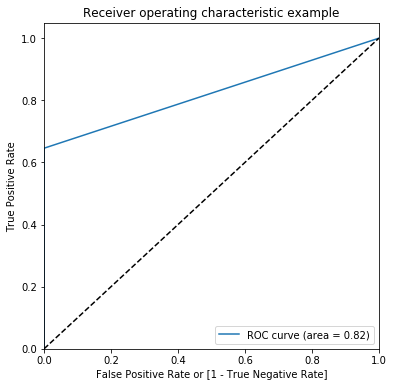

(array([0.00000000e+00, 9.37877349e-05, 1.00000000e+00]),
 array([0.        , 0.64583333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [35]:
draw_roc(y_test, prediction_test_logr)

In [36]:
# ROC AUC Score on test data.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_logr)))

ROC Score on Test Data 0.82


##### KNN with best K.

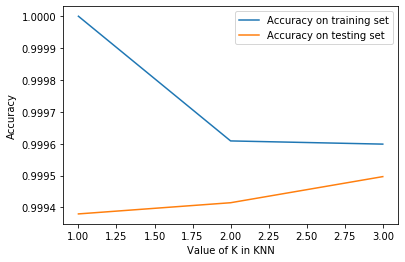

In [37]:
k_range = range(1, 4)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [38]:
# Choosing n = 3
knn=KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train)

In [39]:
prediction_train_knn = knn_model.predict(X_train)
print('KNN on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_knn)))

KNN on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.96      0.80      0.87       348

    accuracy                           1.00    199364
   macro avg       0.98      0.90      0.94    199364
weighted avg       1.00      1.00      1.00    199364




In [41]:
# ROC AUC Score on train data.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_knn)))

ROC Score on Train Data 0.90


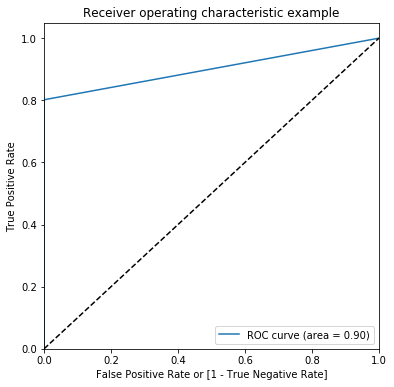

(array([0.00000000e+00, 5.52719379e-05, 1.00000000e+00]),
 array([0.        , 0.80172414, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [40]:
draw_roc(y_train, prediction_train_knn)

In [42]:
prediction_test_knn = knn_model.predict(X_test)
print('KNN on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_knn)))

KNN on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.74      0.83       144

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443




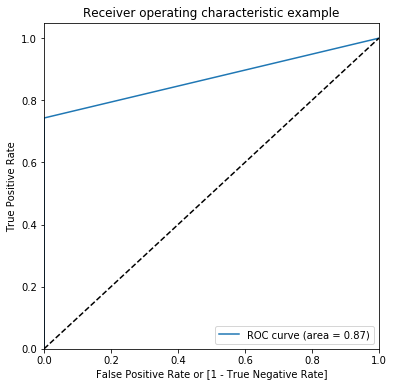

(array([0.00000000e+00, 7.03408012e-05, 1.00000000e+00]),
 array([0.        , 0.74305556, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [43]:
draw_roc(y_test, prediction_test_knn)

In [44]:
# ROC AUC Score on test data.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_knn)))

ROC Score on Test Data 0.87


In [45]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

##### SVM with hyperparameter tuning.

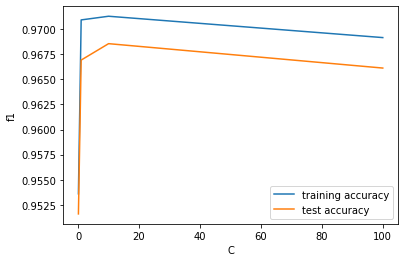

In [46]:
from sklearn.svm import SVC
# specify range of parameters (C) cost as a list
params = {"C": [0.1, 1, 10, 100]}

svm = SVC(kernel='linear')
svm_model = GridSearchCV(estimator = svm, param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 0,
                        n_jobs=4,
                       return_train_score=True) 
svm_model.fit(X_train, y_train)
plot_traintestAcc(svm_model.cv_results_,'C')

In [47]:
# Best parameters from SVM
svm_model.best_params_

{'C': 10}

In [48]:
# SVM with c = 10
model_svm = SVC(C = 10) 
model_svm.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
prediction_train_svm = model_svm.predict(X_train)
print('SVM on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_svm)))

SVM on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.89      0.80      0.84       348

    accuracy                           1.00    199364
   macro avg       0.95      0.90      0.92    199364
weighted avg       1.00      1.00      1.00    199364




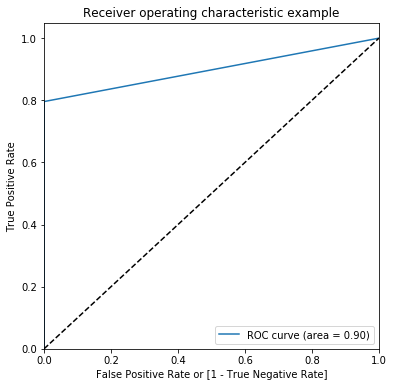

(array([0.00000000e+00, 1.65815814e-04, 1.00000000e+00]),
 array([0.        , 0.79597701, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [50]:
draw_roc(y_train, prediction_train_svm)

In [51]:
# ROC AUC Score on train data.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_svm)))

ROC Score on Train Data 0.90


In [52]:
prediction_test_svm = model_svm.predict(X_test)
print('SVM on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_svm)))

SVM on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.83      0.87       144

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443




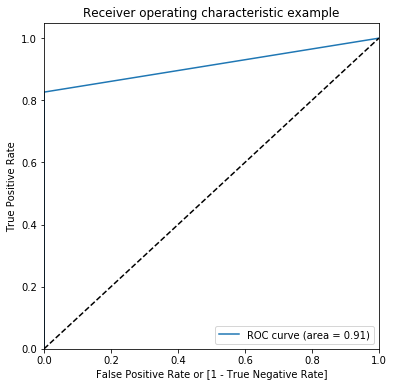

(array([0.00000000e+00, 1.17234669e-04, 1.00000000e+00]),
 array([0.        , 0.82638889, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [53]:
draw_roc(y_test, prediction_test_svm)

In [54]:
# ROC AUC Score on test data.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_svm)))

ROC Score on Test Data 0.91


##### Random Forest with hyperparameter tuning.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.2min finished


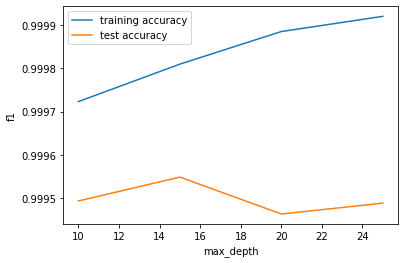

In [190]:
from sklearn.ensemble import RandomForestClassifier
# Tuning max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    verbose = 1,
                    n_jobs=4,
                    cv=5,return_train_score=True)
rfgs.fit(X_train,y_train)

plot_traintestAcc(rfgs.cv_results_,'max_depth')

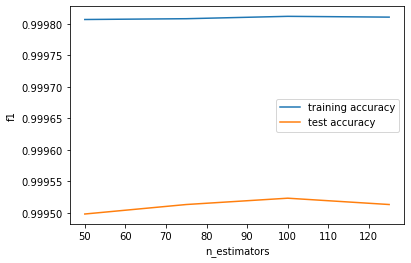

In [192]:
# Tuning n_estimator
parameters = {'n_estimators': range(50, 150, 50)}
rf1 = RandomForestClassifier(max_depth=15,random_state=10)
rfgs = GridSearchCV(rf1,parameters, 
                    cv=5,n_jobs=4,return_train_score=True)
rfgs.fit(X_train,y_train)

plot_traintestAcc(rfgs.cv_results_,'n_estimators')

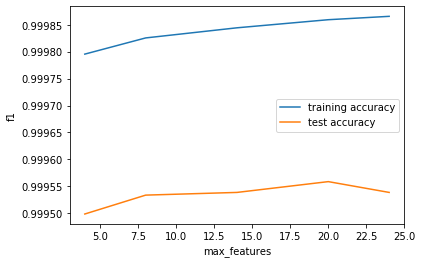

In [193]:
# Tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2 = RandomForestClassifier(max_depth=15,n_estimators=100,random_state=10)
rfgs = GridSearchCV(rf2,parameters, 
                    cv=5,n_jobs=4,return_train_score=True)
rfgs.fit(X_train,y_train)

plot_traintestAcc(rfgs.cv_results_,'max_features')

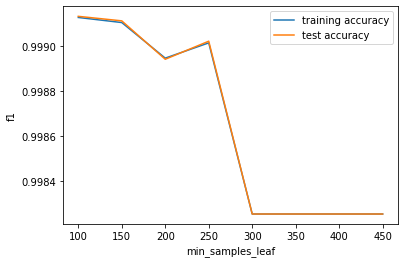

In [194]:
#Tuning min_samples_leaf
parameters = {'min_samples_leaf': range (100,500,50)}
rf3 = RandomForestClassifier(max_depth=15,n_estimators=100,max_features=20, random_state=10)
rfgs = GridSearchCV(rf3,parameters, 
                    cv=5,n_jobs=4,return_train_score=True)
rfgs.fit(X_train,y_train)

plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

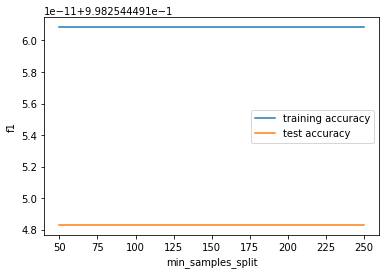

In [196]:
#Tuning min_samples_split
parameters = {'min_samples_split': range (50,300,50)}
rf4 = RandomForestClassifier(max_depth=15,n_estimators=100,max_features=20,min_samples_leaf=300,random_state=10)
rfgs = GridSearchCV(rf4,parameters, 
                    cv=5,n_jobs=4,return_train_score=True)
rfgs.fit(X_train,y_train)

plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

In [197]:
# Tunned Random Forest
model_rf = RandomForestClassifier(max_depth=15,
                                  n_estimators=100,
                                  max_features=20,
                                  min_samples_leaf=300,
                                  min_samples_split=50,
                                  random_state=10)
model_rf.fit(X_train, y_train)
# Make predictions on Test Data
prediction_train_rf = model_rf.predict(X_train)
# Make predictions on Test Data
prediction_test_rf = model_rf.predict(X_test)

In [198]:
print('Random Forest on Train Data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_rf)))

Random Forest on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.74      0.60      0.66       348

    accuracy                           1.00    199364
   macro avg       0.87      0.80      0.83    199364
weighted avg       1.00      1.00      1.00    199364




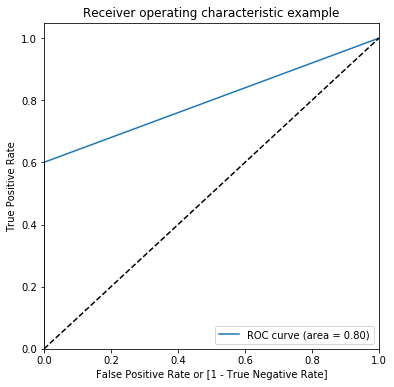

(array([0.00000000e+00, 3.76854122e-04, 1.00000000e+00]),
 array([0.        , 0.60057471, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [199]:
# Area Under ROC curve
draw_roc(y_train, prediction_train_rf)

In [200]:
# AUC ROC Score on Train Data.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_rf)))

ROC Score on Train Data 0.80


In [201]:
print('Random Forest on Test Data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_rf)))

Random Forest on Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.74      0.60      0.66       144

    accuracy                           1.00     85443
   macro avg       0.87      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443




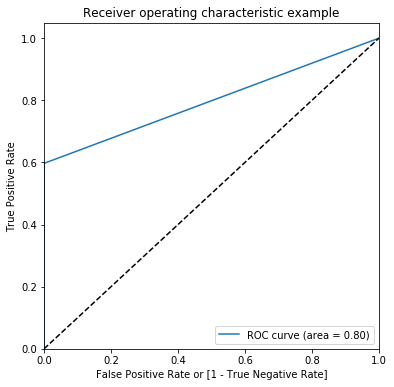

(array([0.00000000e+00, 3.63427473e-04, 1.00000000e+00]),
 array([0.        , 0.59722222, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [202]:
# ROC curve
draw_roc(y_test, prediction_test_rf)

In [203]:
# ROC AUC Score on Test Data.
print("ROC Score on Test Data{:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_rf)))

ROC Score on Test Data0.80


In [205]:
# XgBoost Algorithm with hyperparameter tuning
from xgboost import XGBClassifier

# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.9816018504254211)

In [206]:
# hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.4}, 0.9826708789145405)

In [208]:
# Final XgBoost Algorithm

model_xgboost = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
model_xgboost.fit(X_train,y_train)
#X_train_xg = X_train.as_matrix()
#X_test_xg = X_test.as_matrix()
# prediction on train data
prediction_train_xgboost = model_xgboost.predict(X_train)
#prediction on test data
prediction_test_xgboost = model_xgboost.predict(X_test)

In [209]:
print('Xg Boost on train data :\n {}\n'.format(metrics.classification_report(y_train, prediction_train_xgboost)))

Xg Boost on train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.97      0.84      0.90       348

    accuracy                           1.00    199364
   macro avg       0.98      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364




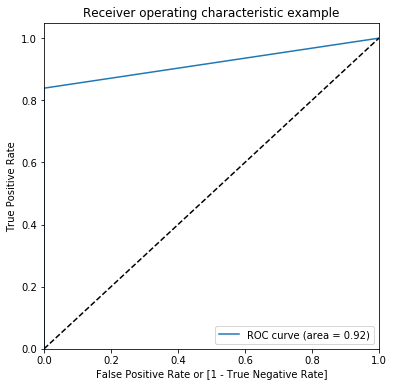

(array([0.00000000e+00, 4.52224947e-05, 1.00000000e+00]),
 array([0.        , 0.83908046, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [210]:
# ROC curve
draw_roc(y_train, prediction_train_xgboost)

In [211]:
# AUC ROC Score on Train Data.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_xgboost)))

ROC Score on Train Data 0.92


In [212]:
print('Xg Booston test data :\n {}\n'.format(metrics.classification_report(y_test, prediction_test_xgboost)))

Xg Booston test data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.91      0.79      0.85       144

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443




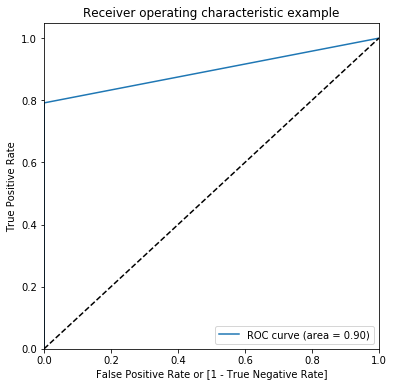

(array([0.00000000e+00, 1.28958135e-04, 1.00000000e+00]),
 array([0.        , 0.79166667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [213]:
# ROC curve
draw_roc(y_test, prediction_test_xgboost)

In [214]:
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_xgboost)))

ROC Score on Test Data 0.90


#### Model Performance based on AUC Score:
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Logistic Regression| 0.81 | 0.81 |
| KNN| 0.90 | 0.87 |
| SVM| 0.90 | 0.91 |
| Random Forest| 0.80 | 0.80 |
| XG Boost| 0.92 | 0.90 |


#### Print the important features of the best model XG Boost to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 13


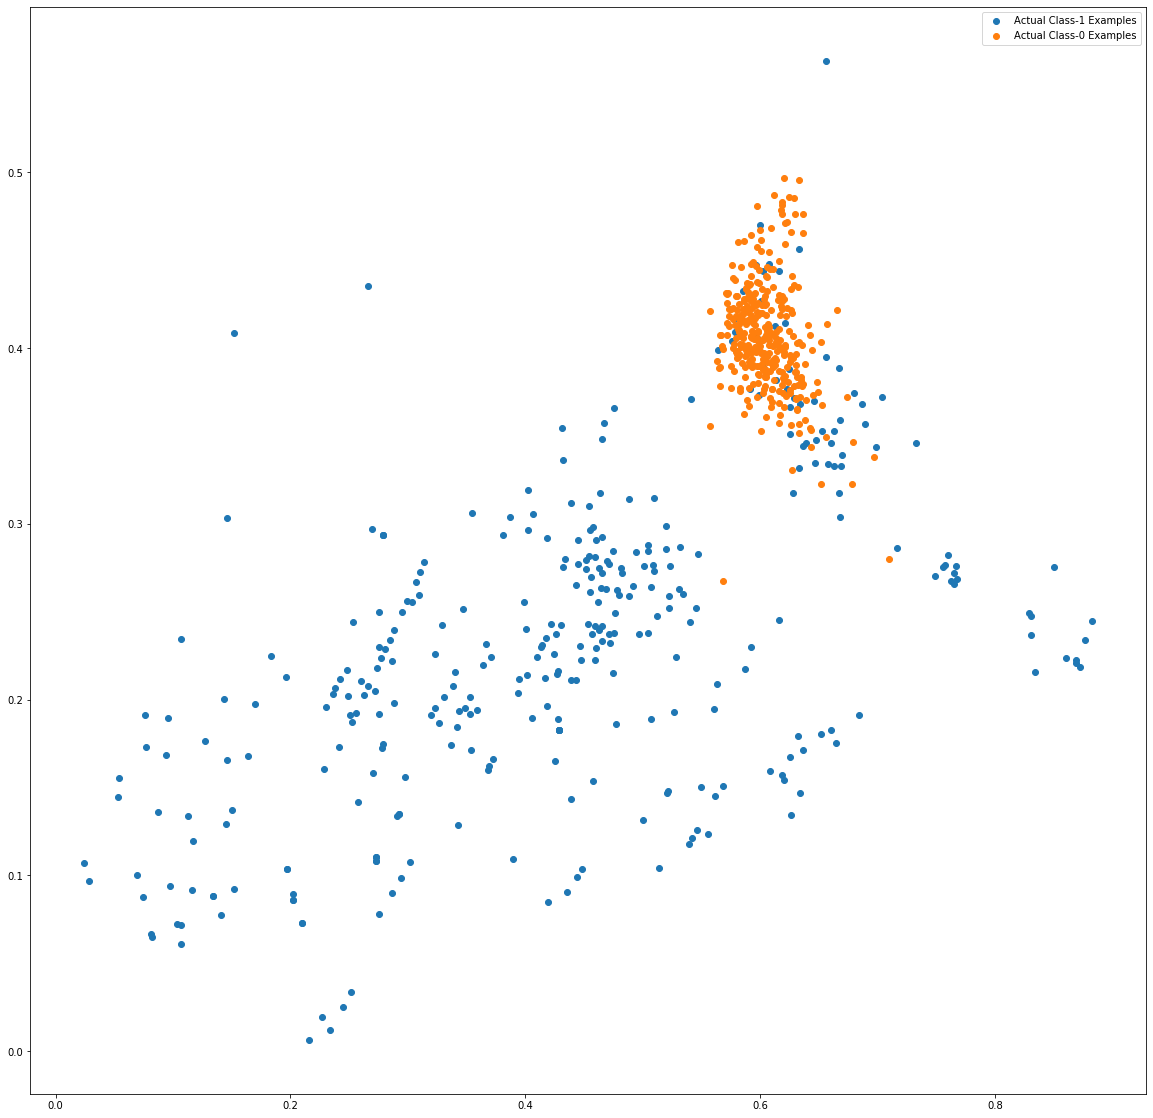

In [215]:
var_imp = []
for i in model_xgboost.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(model_xgboost.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(model_xgboost.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(model_xgboost.feature_importances_)[-3])+1)

# Variable on Index-18 and Index-15 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(model_xgboost.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(model_xgboost.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [217]:
# To get the weights of all the variables
importances_xgboost = model_xgboost.feature_importances_
weights_xgboost = pd.Series(importances_xgboost,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Xg Boost Model')

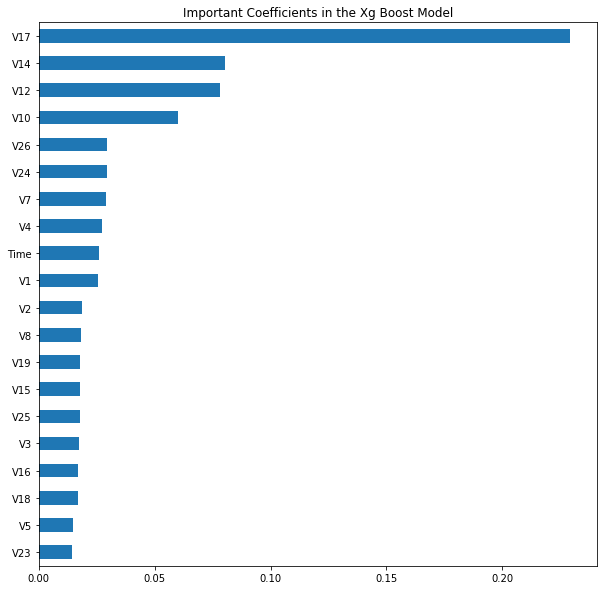

In [218]:
imp_coef_xgboost = pd.concat([weights_xgboost.sort_values().head(10),
                     weights_xgboost.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_xgboost.plot(kind = "barh")
plt.title("Important Coefficients in the Xg Boost Model")

## Model Building
- Build different models on the balanced dataset and see the result

### SMOTE :

In [10]:
# Handling Class imbalance using Synthetic Minority Over-sampling Technique.
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, class event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 348
Before OverSampling, counts of label '0': 199016 

Before OverSampling, class event rate : 0.17% 



In [11]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [12]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, class event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (398032, 30)
After OverSampling, the shape of train_y: (398032,) 

After OverSampling, counts of label '1': 199016
After OverSampling, counts of label '0': 199016
After OverSampling, class event rate : 50.0% 



##### Print the class distribution after applying SMOTE 

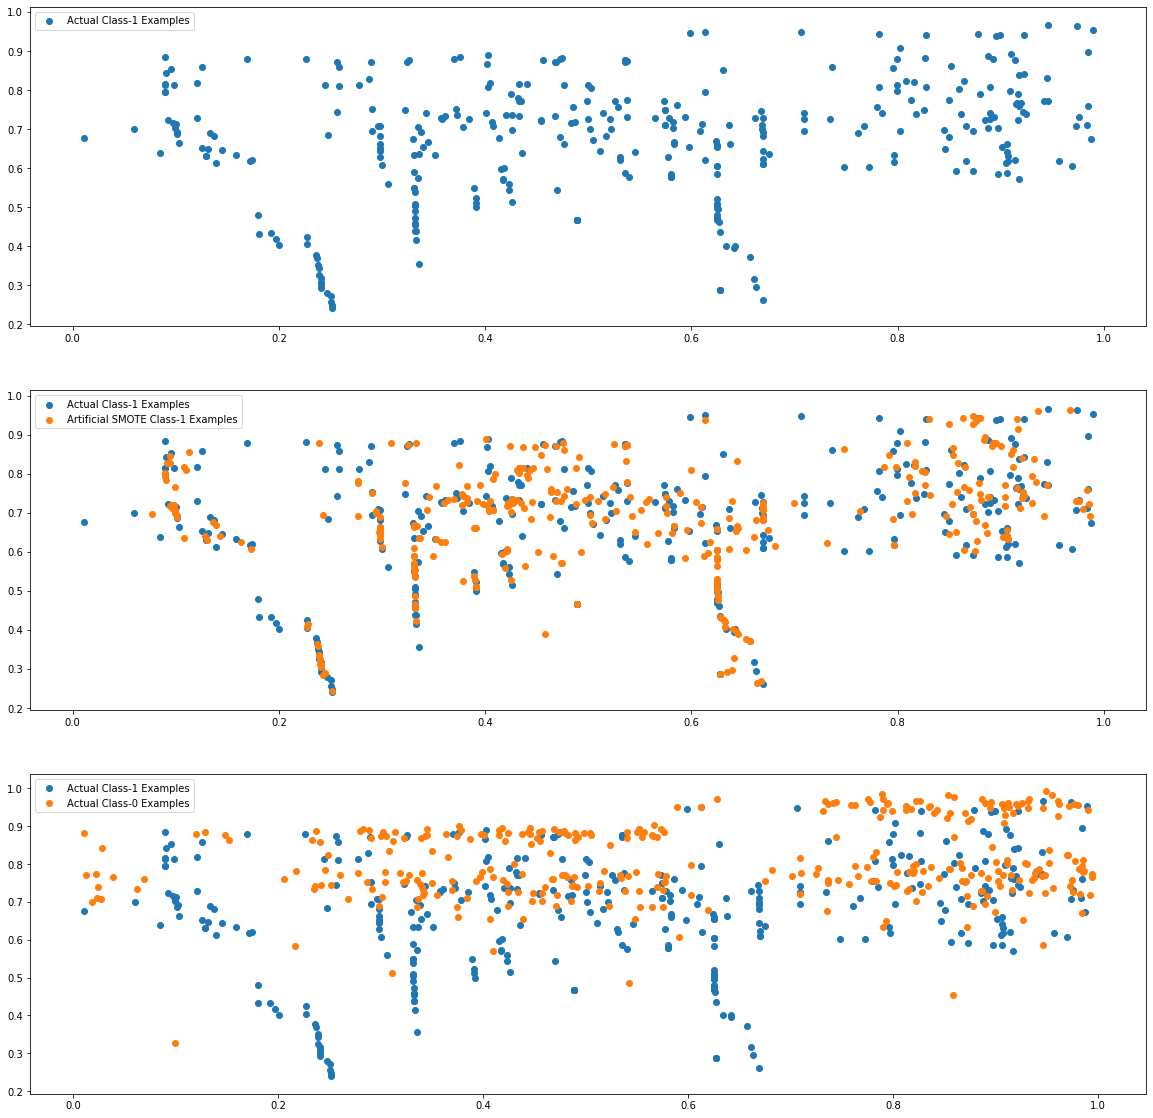

In [223]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Logistic Regression:

In [224]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr_sm = LogisticRegression()
model_lr_sm = model_lr_sm.fit(X_train_res, y_train_res)

In [225]:
from sklearn import metrics
#prediction on train data
prediction_train_logr_sm = model_lr_sm.predict(X_train)
#prediction on test data
prediction_test_logr_sm = model_lr_sm.predict(X_test)

In [226]:
print('Logistic Regression on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_logr_sm)))

Logistic Regression on train data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199016
           1       0.07      0.92      0.13       348

    accuracy                           0.98    199364
   macro avg       0.53      0.95      0.56    199364
weighted avg       1.00      0.98      0.99    199364




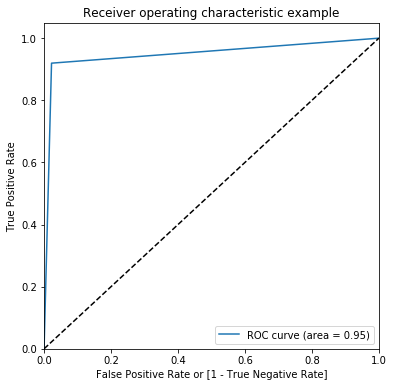

(array([0.        , 0.02227459, 1.        ]),
 array([0.        , 0.91954023, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [227]:
draw_roc(y_train, prediction_train_logr_sm)

In [228]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_logr_sm)))

ROC Score on Train Data 0.95


In [229]:
print('Logistic Regression on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_logr_sm)))

Logistic Regression on test data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85299
           1       0.07      0.90      0.12       144

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443




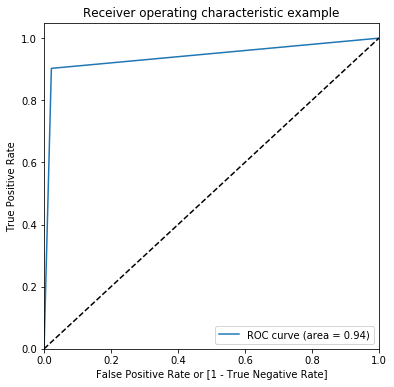

(array([0.        , 0.02181737, 1.        ]),
 array([0.        , 0.90277778, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [230]:
draw_roc(y_test, prediction_test_logr_sm)

In [231]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_logr_sm)))

ROC Score on Test Data 0.94


##### KNN :

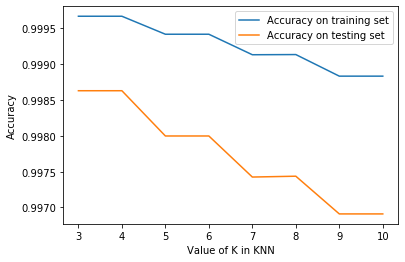

In [232]:
k_range = range(3, 11)
score1=[]
score2=[]
for k in k_range:
    knn_sm=KNeighborsClassifier(n_neighbors=k)
    knn_sm.fit(X_train_res,y_train_res)
    score1.append(knn_sm.score(X_train_res,y_train_res))
    score2.append(knn_sm.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [233]:
# Choosing n = 3
knn_sm=KNeighborsClassifier(n_neighbors=3)
knn_model_sm = knn_sm.fit(X_train_res,y_train_res)

In [234]:
prediction_train_knn_sm = knn_model_sm.predict(X_train)
print('KNN on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_knn_sm)))

KNN on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.73      1.00      0.84       348

    accuracy                           1.00    199364
   macro avg       0.86      1.00      0.92    199364
weighted avg       1.00      1.00      1.00    199364




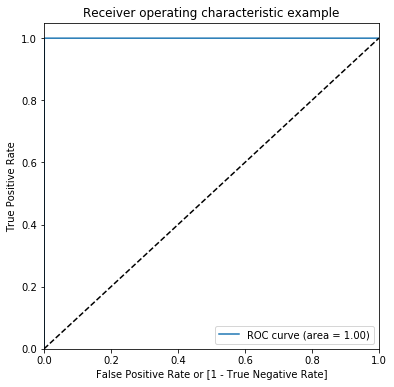

(array([0.00000000e+00, 6.58238534e-04, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [235]:
draw_roc(y_train, prediction_train_knn_sm)

In [236]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_knn_sm)))

ROC Score on Train Data 1.00


In [237]:
prediction_test_knn_sm = knn_model_sm.predict(X_test)
print('KNN on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_knn_sm)))

KNN on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.56      0.83      0.67       144

    accuracy                           1.00     85443
   macro avg       0.78      0.92      0.84     85443
weighted avg       1.00      1.00      1.00     85443




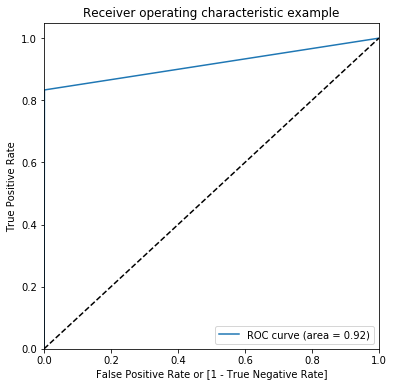

(array([0.        , 0.00109028, 1.        ]),
 array([0.        , 0.83333333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [238]:
draw_roc(y_test, prediction_test_knn_sm)

In [241]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_knn_sm)))

ROC Score on Test Data 0.92


##### Random Forest

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  6.9min finished


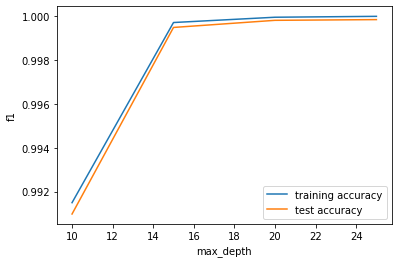

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Tuning max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf_sm = RandomForestClassifier()
rfgs_sm = GridSearchCV(rf_sm, parameters, 
                    cv=5,verbose = 1,
                    n_jobs=4,return_train_score=True)
rfgs_sm.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs_sm.cv_results_,'max_depth')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 56.0min finished


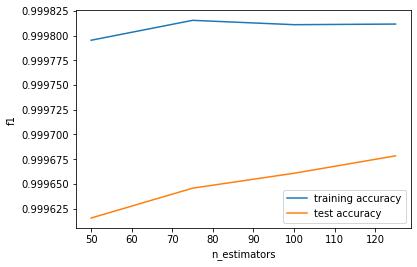

In [18]:
# Tuning n_estimator
parameters = {'n_estimators': range(50, 150, 25)}
rf1_sm = RandomForestClassifier(max_depth=15,random_state=10)
rfgs1_sm = GridSearchCV(rf1_sm,parameters,verbose = 1,
                    n_jobs=4,cv=5,return_train_score=True)
rfgs1_sm.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs1_sm.cv_results_,'n_estimators')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 244.0min finished


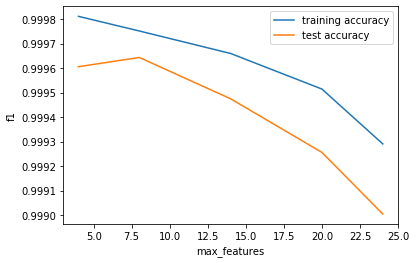

In [19]:
# Tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2_sm = RandomForestClassifier(max_depth=15,n_estimators=150,random_state=10)
rfgs2_sm = GridSearchCV(rf2_sm,parameters,verbose = 1,n_jobs=4,
                    cv=5,return_train_score=True)
rfgs2_sm.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs2_sm.cv_results_,'max_features')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 154.0min finished


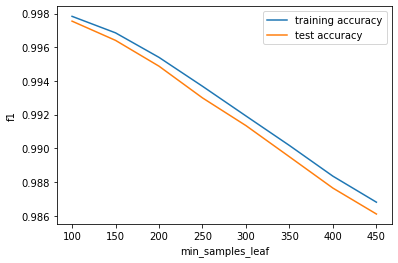

In [20]:
#Tuning min_samples_leaf
parameters = {'min_samples_leaf': range (100,500,50)}
rf3_sm = RandomForestClassifier(max_depth=15,n_estimators=150,max_features=7, random_state=10)
rfgs3_sm = GridSearchCV(rf3_sm,parameters,verbose = 1,n_jobs=4, 
                    cv=5,return_train_score=True)
rfgs3_sm.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs3_sm.cv_results_,'min_samples_leaf')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 113.8min finished


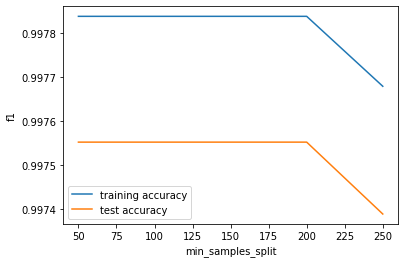

In [21]:
#Tuning min_samples_split
parameters = {'min_samples_split': range (50,300,50)}
rf4_sm = RandomForestClassifier(max_depth=15,n_estimators=150,max_features=7,min_samples_leaf=100,random_state=10)
rfgs4_sm = GridSearchCV(rf4_sm,parameters,verbose = 1,n_jobs=4,
                    cv=5,return_train_score=True)
rfgs4_sm.fit(X_train_res,y_train_res)

plot_traintestAcc(rfgs4_sm.cv_results_,'min_samples_split')

In [22]:
# Final paratmers for Random Forest
model_rf_sm = RandomForestClassifier(max_depth=15,
                                  n_estimators=150,
                                  max_features=7,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=200)
model_rf_sm.fit(X_train_res, y_train_res)
# Make predictions on Train Data
prediction_train_rf_sm = model_rf_sm.predict(X_train)
# Make predictions on Test Data
prediction_test_rf_sm = model_rf_sm.predict(X_test)

In [23]:
print('Random Forest on Train Data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_rf_sm)))

Random Forest on Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.46      1.00      0.63       348

    accuracy                           1.00    199364
   macro avg       0.73      1.00      0.82    199364
weighted avg       1.00      1.00      1.00    199364




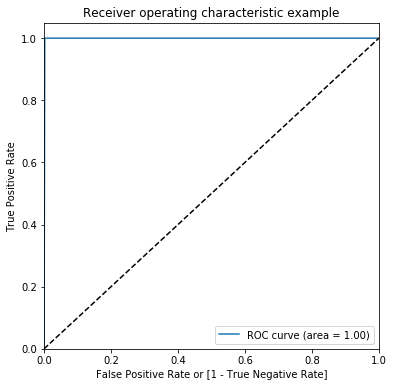

(array([0.        , 0.00201994, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [24]:
# ROC curve
draw_roc(y_train, prediction_train_rf_sm)

In [25]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_rf_sm)))

ROC Score on Train Data 1.00


In [26]:
print('Random Forest on Test Data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_rf_sm)))

Random Forest on Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.40      0.86      0.55       144

    accuracy                           1.00     85443
   macro avg       0.70      0.93      0.77     85443
weighted avg       1.00      1.00      1.00     85443




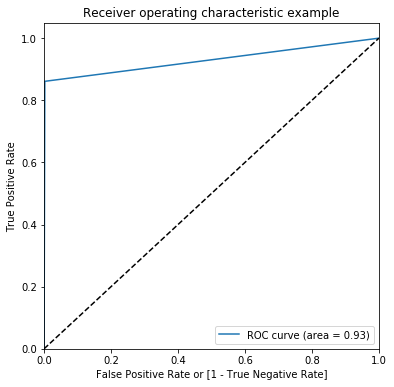

(array([0.        , 0.00218056, 1.        ]),
 array([0.        , 0.86111111, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [27]:
# ROC curve
draw_roc(y_test, prediction_test_rf_sm)

In [28]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_rf_sm)))

ROC Score on Test Data 0.93


##### XG Boost

In [30]:
from xgboost import XGBClassifier

# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch_sm = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch_sm.fit(X_train_res, y_train_res)
gsearch_sm.best_params_, gsearch_sm.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9999898105065811)

In [31]:
# Final XgBoost Algorithm

model_xgboost_sm = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
model_xgboost_sm.fit(X_train_res,y_train_res)
X_train_xg = X_train.as_matrix()
X_test_xg = X_test.as_matrix()
# prediction on train data
prediction_train_xgboost_sm = model_xgboost_sm.predict(X_train_xg)
#prediction on test data
prediction_test_xgboost_sm = model_xgboost_sm.predict(X_test_xg)

In [32]:
print('Xg Boost on train data :\n {}\n'.format(metrics.classification_report(y_train, prediction_train_xgboost_sm)))

Xg Boost on train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.99      1.00      0.99       348

    accuracy                           1.00    199364
   macro avg       0.99      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364




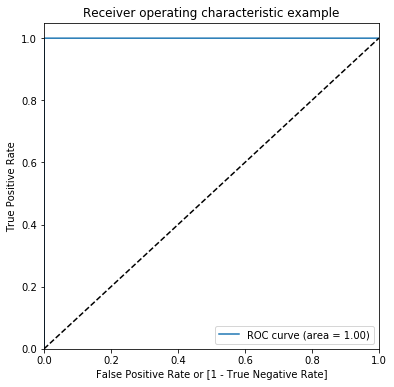

(array([0.00000000e+00, 2.51236082e-05, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [33]:
# ROC curve
draw_roc(y_train, prediction_train_xgboost_sm)

In [34]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_xgboost_sm)))

ROC Score on Train Data 1.00


In [35]:
print('Xg Boost on test data :\n {}\n'.format(metrics.classification_report(y_test, prediction_test_xgboost_sm)))

Xg Boost on test data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.79      0.85      0.82       144

    accuracy                           1.00     85443
   macro avg       0.90      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443




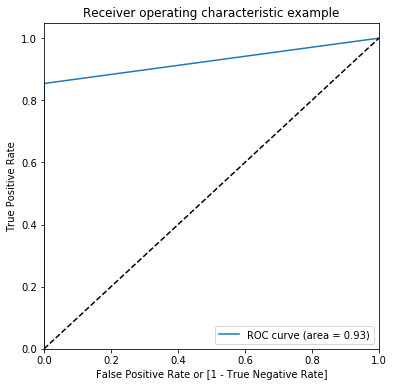

(array([0.0000000e+00, 3.7515094e-04, 1.0000000e+00]),
 array([0.        , 0.85416667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [36]:
# ROC curve
draw_roc(y_test, prediction_test_xgboost_sm)

In [37]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_xgboost_sm)))

ROC Score on Test Data 0.93


#### Model Performance based on AUC Score on the SMOTE dataset:
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Logistic Regression| 0.95 | 0.94 |
| KNN| 1 | 0.92 |
| Random Forest| 1 | 0.93 |
| XG Boost| 1 | 0.93 |


In [38]:
# It seems model performance is same for Random forest and XgBoost as per AUC score. 
# However Xgboost Recall and Precision value is higher compare to Random Forest. Hence Choosing Xgboost as best model for this analysis.
# To get the weights of all the variables
importances_xgboost_sm = model_xgboost_sm.feature_importances_
weights_xgboost_sm = pd.Series(importances_xgboost_sm,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Xg Boost Model with SMOTE')

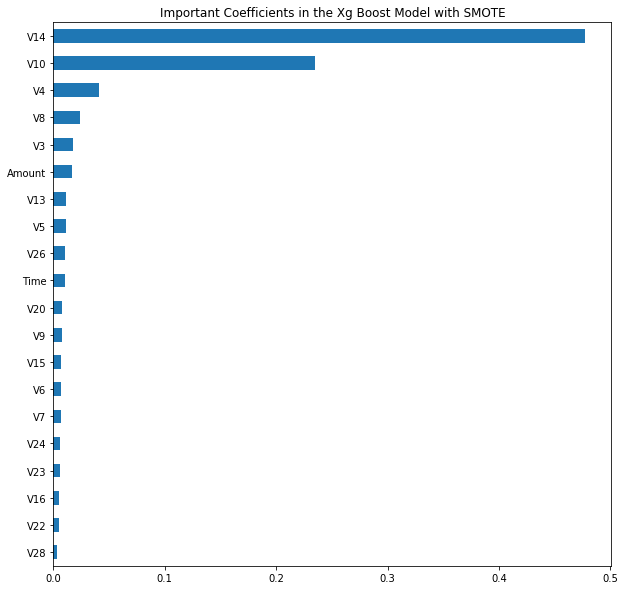

In [39]:
imp_coef_xgboost_sm = pd.concat([weights_xgboost_sm.sort_values().head(10),
                     weights_xgboost_sm.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_xgboost_sm.plot(kind = "barh")
plt.title("Important Coefficients in the Xg Boost Model with SMOTE")

### Applying ADASYN on the data set.

#### Print the class distribution after applying ADASYN

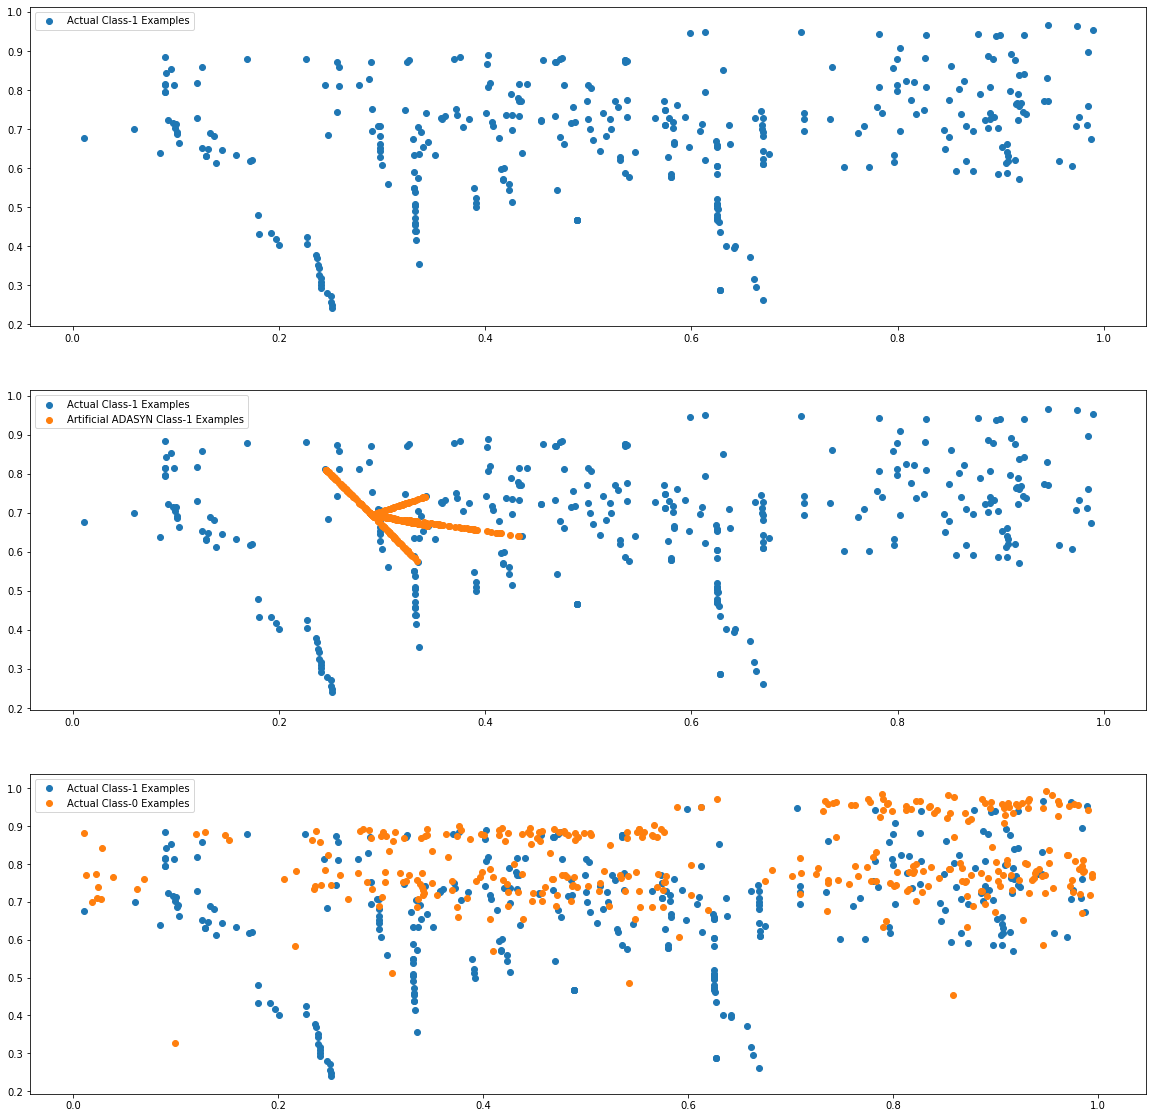

In [40]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [41]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_adasyn.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_adasyn.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_adasyn==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_adasyn==0)))
print("After OverSampling, class event rate : {}% \n".format(round(sum(y_train_adasyn==1)/len(y_train_adasyn)*100,2)))

After OverSampling, the shape of train_X: (398012, 30)
After OverSampling, the shape of train_y: (398012,) 

After OverSampling, counts of label '1': 198996
After OverSampling, counts of label '0': 199016
After OverSampling, class event rate : 50.0% 



##### Logistic Regression :


In [43]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr_adasyn = LogisticRegression()
model_lr_adasyn = model_lr_adasyn.fit(X_train_adasyn, y_train_adasyn)
#prediction on train data
prediction_train_logr_adasyn = model_lr_adasyn.predict(X_train)
#prediction on test data
prediction_test_logr_adasyn = model_lr_adasyn.predict(X_test)

In [44]:
print('Logistic Regression on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_logr_adasyn)))

Logistic Regression on train data:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    199016
           1       0.02      0.95      0.05       348

    accuracy                           0.94    199364
   macro avg       0.51      0.94      0.51    199364
weighted avg       1.00      0.94      0.96    199364




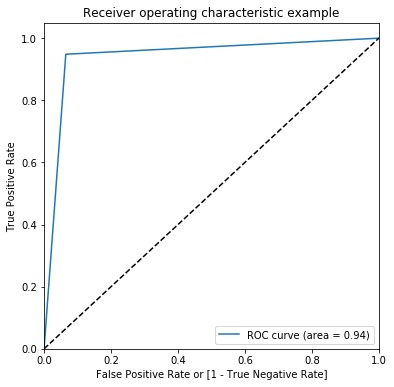

(array([0.        , 0.06488423, 1.        ]),
 array([0.        , 0.94827586, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [45]:
draw_roc(y_train, prediction_train_logr_adasyn)

In [46]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_logr_adasyn)))

ROC Score on Train Data 0.94


In [47]:
print('Logistic Regression on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_logr_adasyn)))

Logistic Regression on test data:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85299
           1       0.02      0.94      0.05       144

    accuracy                           0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443




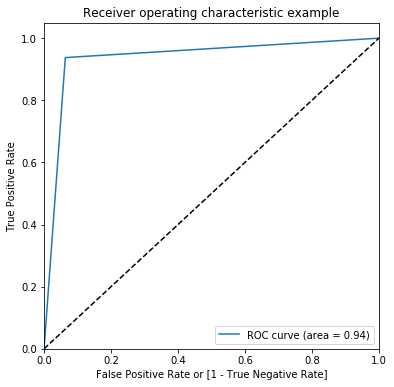

(array([0.        , 0.06342396, 1.        ]),
 array([0.    , 0.9375, 1.    ]),
 array([2, 1, 0], dtype=int64))

In [48]:
draw_roc(y_test, prediction_test_logr_adasyn)

In [49]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_logr_adasyn)))

ROC Score on Test Data 0.94


#### KNN on the ADASYN Dataset

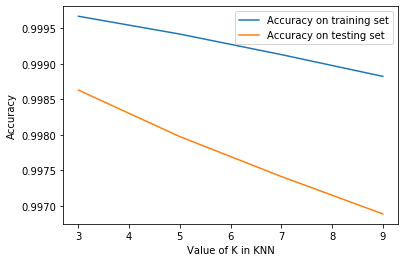

In [53]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(3,11,2)
score1=[]
score2=[]
for k in k_range:
    knn_adasyn=KNeighborsClassifier(n_neighbors=k)
    knn_adasyn.fit(X_train_adasyn,y_train_adasyn)
    score1.append(knn_adasyn.score(X_train_adasyn,y_train_adasyn))
    score2.append(knn_adasyn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [54]:
# Choosing n = 3
knn_adasyn=KNeighborsClassifier(n_neighbors=3)
knn_model_adasyn = knn_adasyn.fit(X_train_adasyn,y_train_adasyn)

In [55]:
prediction_train_knn_adasyn = knn_model_adasyn.predict(X_train)
prediction_test_knn_adasyn = knn_model_adasyn.predict(X_test)

In [56]:
print('KNN on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_knn_adasyn)))

KNN on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.73      1.00      0.84       348

    accuracy                           1.00    199364
   macro avg       0.86      1.00      0.92    199364
weighted avg       1.00      1.00      1.00    199364




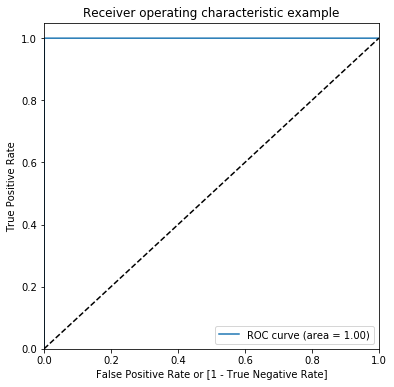

(array([0.00000000e+00, 6.58238534e-04, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [57]:
draw_roc(y_train, prediction_train_knn_adasyn)

In [58]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_knn_adasyn)))

ROC Score on Train Data 1.00


In [59]:
print('KNN on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_knn_adasyn)))

KNN on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.56      0.83      0.67       144

    accuracy                           1.00     85443
   macro avg       0.78      0.92      0.84     85443
weighted avg       1.00      1.00      1.00     85443




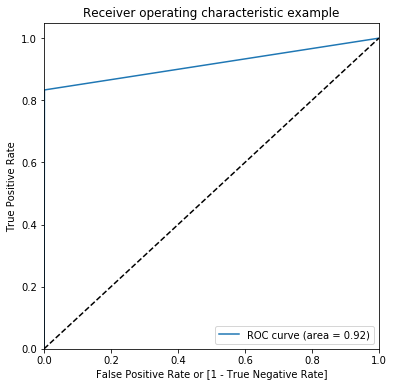

(array([0.        , 0.00109028, 1.        ]),
 array([0.        , 0.83333333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [60]:
draw_roc(y_test, prediction_test_knn_adasyn)

In [61]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_knn_adasyn)))

ROC Score on Train Data 0.92


#### Random Forest with Adasyn Data

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  4.9min finished


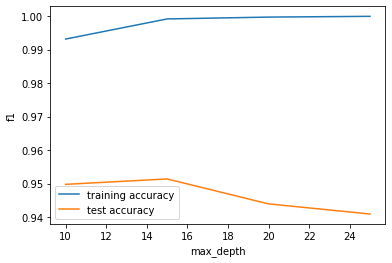

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Tuning max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf_adasyn = RandomForestClassifier()
rfgs_adasyn = GridSearchCV(rf_adasyn, parameters, 
                    cv=5,verbose = 1,
                    n_jobs=4,return_train_score=True)
rfgs_adasyn.fit(X_train_adasyn,y_train_adasyn)

plot_traintestAcc(rfgs_adasyn.cv_results_,'max_depth')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 35.4min finished


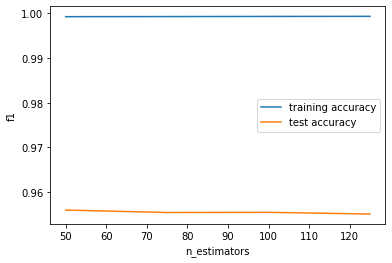

In [63]:
# Tuning n_estimator
parameters = {'n_estimators': range(50, 150, 25)}
rf1_adasyn = RandomForestClassifier(max_depth=15,random_state=10)
rfgs1_adasyn = GridSearchCV(rf1_adasyn,parameters,verbose = 1,
                    n_jobs=4,cv=5,return_train_score=True)
rfgs1_adasyn.fit(X_train_adasyn,y_train_adasyn)

plot_traintestAcc(rfgs1_adasyn.cv_results_,'n_estimators')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 64.5min finished


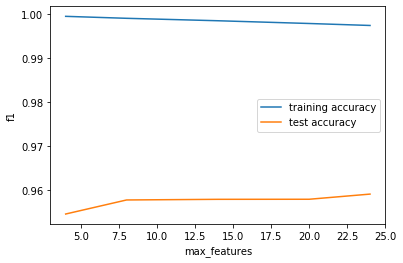

In [64]:
# Tuning "max features"
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2_adasyn = RandomForestClassifier(max_depth=15,n_estimators=50,random_state=10)
rfgs2_adasyn = GridSearchCV(rf2_adasyn,parameters,verbose = 1,n_jobs=4,
                    cv=5,return_train_score=True)
rfgs2_adasyn.fit(X_train_adasyn,y_train_adasyn)

plot_traintestAcc(rfgs2_adasyn.cv_results_,'max_features')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 64.8min finished


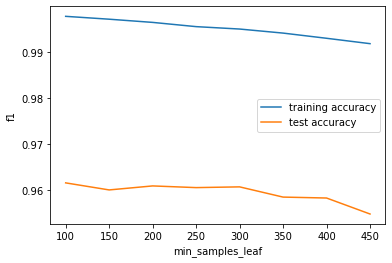

In [65]:
#Tuning "min_samples_leaf"
parameters = {'min_samples_leaf': range (100,500,50)}
rf3_adasyn = RandomForestClassifier(max_depth=15,n_estimators=50,max_features=10, random_state=10)
rfgs3_adasyn = GridSearchCV(rf3_adasyn,parameters,verbose = 1,n_jobs=4, 
                    cv=5,return_train_score=True)
rfgs3_adasyn.fit(X_train_adasyn,y_train_adasyn)

plot_traintestAcc(rfgs3_adasyn.cv_results_,'min_samples_leaf')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 43.6min finished


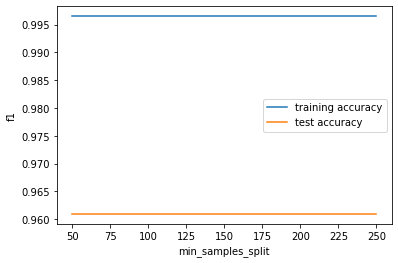

In [66]:
#Tuning "min_samples_split"
parameters = {'min_samples_split': range (50,300,50)}
rf4_adasyn = RandomForestClassifier(max_depth=15,n_estimators=50,max_features=10,min_samples_leaf=200,random_state=10)
rfgs4_adasyn = GridSearchCV(rf4_adasyn,parameters,verbose = 1,n_jobs=4,
                    cv=5,return_train_score=True)
rfgs4_adasyn.fit(X_train_adasyn,y_train_adasyn)

plot_traintestAcc(rfgs4_adasyn.cv_results_,'min_samples_split')

In [67]:
# Final tuned Random Forest
model_rf_adasyn = RandomForestClassifier(max_depth=15,
                                  n_estimators=50,
                                  max_features=10,
                                  min_samples_leaf=200,
                                  min_samples_split=50,
                                  random_state=200)
model_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
# Make predictions on Train Data
prediction_train_rf_adasyn = model_rf_adasyn.predict(X_train)
# Make predictions on Test Data
prediction_test_rf_adasyn = model_rf_adasyn.predict(X_test)

In [68]:
print('Random Forest on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_rf_adasyn)))

Random Forest on train data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199016
           1       0.24      0.99      0.39       348

    accuracy                           0.99    199364
   macro avg       0.62      0.99      0.69    199364
weighted avg       1.00      0.99      1.00    199364




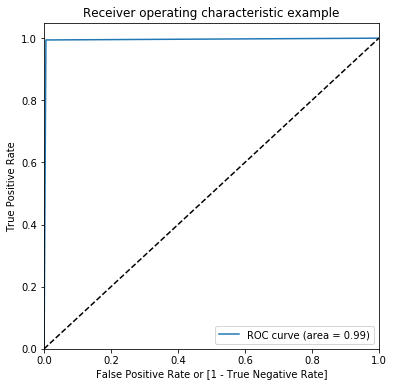

(array([0.        , 0.00549705, 1.        ]),
 array([0.        , 0.99425287, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [69]:
draw_roc(y_train, prediction_train_rf_adasyn)

In [70]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_rf_adasyn)))

ROC Score on Train Data 0.99


In [71]:
print('Random Forest on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_rf_adasyn)))

Random Forest on test data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85299
           1       0.20      0.86      0.32       144

    accuracy                           0.99     85443
   macro avg       0.60      0.93      0.66     85443
weighted avg       1.00      0.99      1.00     85443




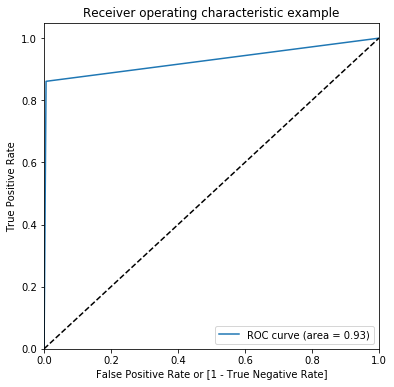

(array([0.        , 0.00592035, 1.        ]),
 array([0.        , 0.86111111, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [72]:
draw_roc(y_test, prediction_test_rf_adasyn)

In [73]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_rf_adasyn)))

ROC Score on Test Data 0.93


#### XG Boost on the Adasyn dataset

In [74]:
from xgboost import XGBClassifier

# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch_rf_adasyn = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
gsearch_rf_adasyn.best_params_, gsearch_rf_adasyn.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9991702942471767)

In [75]:
# More hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2_rf_adasyn = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
gsearch2_rf_adasyn.best_params_, gsearch2_rf_adasyn.best_score_

({'gamma': 0.1}, 0.958561111885014)

In [77]:
# Final XgBoost Algorithm

model_xgboost_adasyn = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
model_xgboost_adasyn.fit(X_train_adasyn,y_train_adasyn)
X_train_xg = X_train.as_matrix()
X_test_xg = X_test.as_matrix()
# prediction on train data
prediction_train_xgboost_adasyn = model_xgboost_adasyn.predict(X_train_xg)
#prediction on test data
prediction_test_xgboost_adasyn = model_xgboost_adasyn.predict(X_test_xg)

In [78]:
print('Xg Boost on train data :\n {}\n'.format(metrics.classification_report(y_train, prediction_train_xgboost_adasyn)))

Xg Boost on train data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.99      1.00      0.99       348

    accuracy                           1.00    199364
   macro avg       0.99      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364




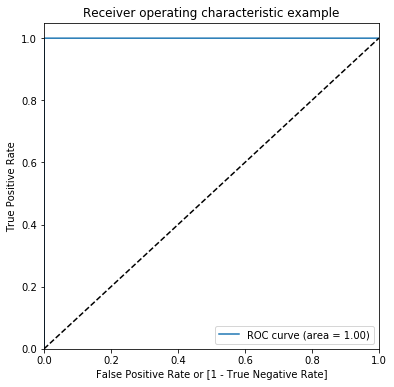

(array([0.00000000e+00, 2.51236082e-05, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [79]:
draw_roc(y_train, prediction_train_xgboost_adasyn)

In [80]:
# AUC ROC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_xgboost_adasyn)))

ROC Score on Train Data 1.00


In [81]:
print('Xg Boost on test data :\n {}\n'.format(metrics.classification_report(y_test, prediction_test_xgboost_adasyn)))

Xg Boost on test data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.76      0.85      0.80       144

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443




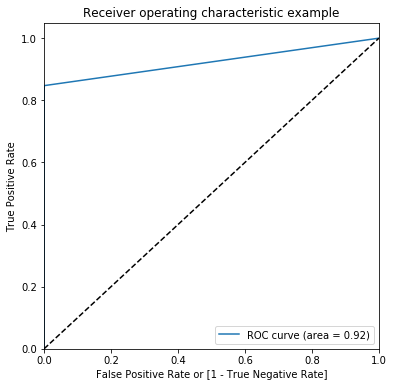

(array([0.00000000e+00, 4.45491741e-04, 1.00000000e+00]),
 array([0.        , 0.84722222, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [82]:
draw_roc(y_test, prediction_test_xgboost_adasyn)

In [83]:
# AUC ROC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_xgboost_adasyn)))

ROC Score on Train Data 0.92


#### Model Performance based on AUC Score on the ADASYN dataset:
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Logistic Regression| 0.94 | 0.94 |
| KNN| 1 | 0.92 |
| Random Forest| 0.99 | 0.93 |
| XG Boost| 1 | 0.92 |

We are selecting XG Boost as final model here as with higher Auc score and Precision for the test Data.

In [85]:
# To get the weights of all the variables
importances_xgboost_adasyn = model_xgboost_adasyn.feature_importances_
weights_xgboost_adasyn = pd.Series(importances_xgboost_adasyn,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Xg Boost Model')

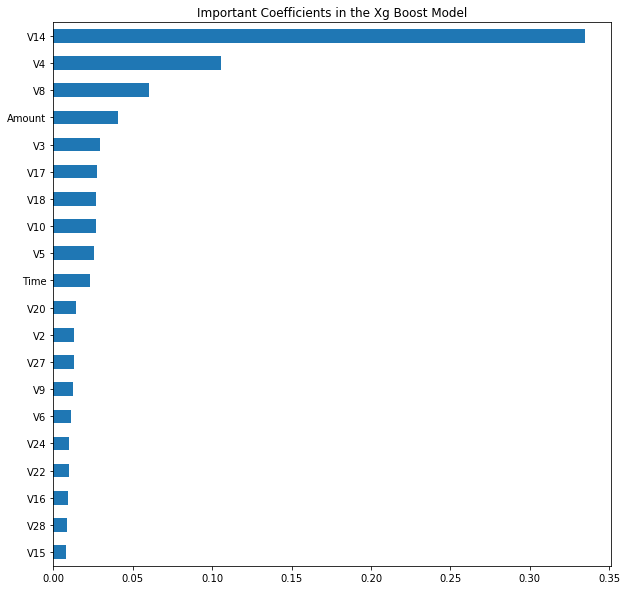

In [86]:
imp_coef_xgboost_adasyn = pd.concat([weights_xgboost_adasyn.sort_values().head(10),
                     weights_xgboost_adasyn.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_xgboost_adasyn.plot(kind = "barh")
plt.title("Important Coefficients in the Xg Boost Model")

#### Applying Random OverSampler on the data set.

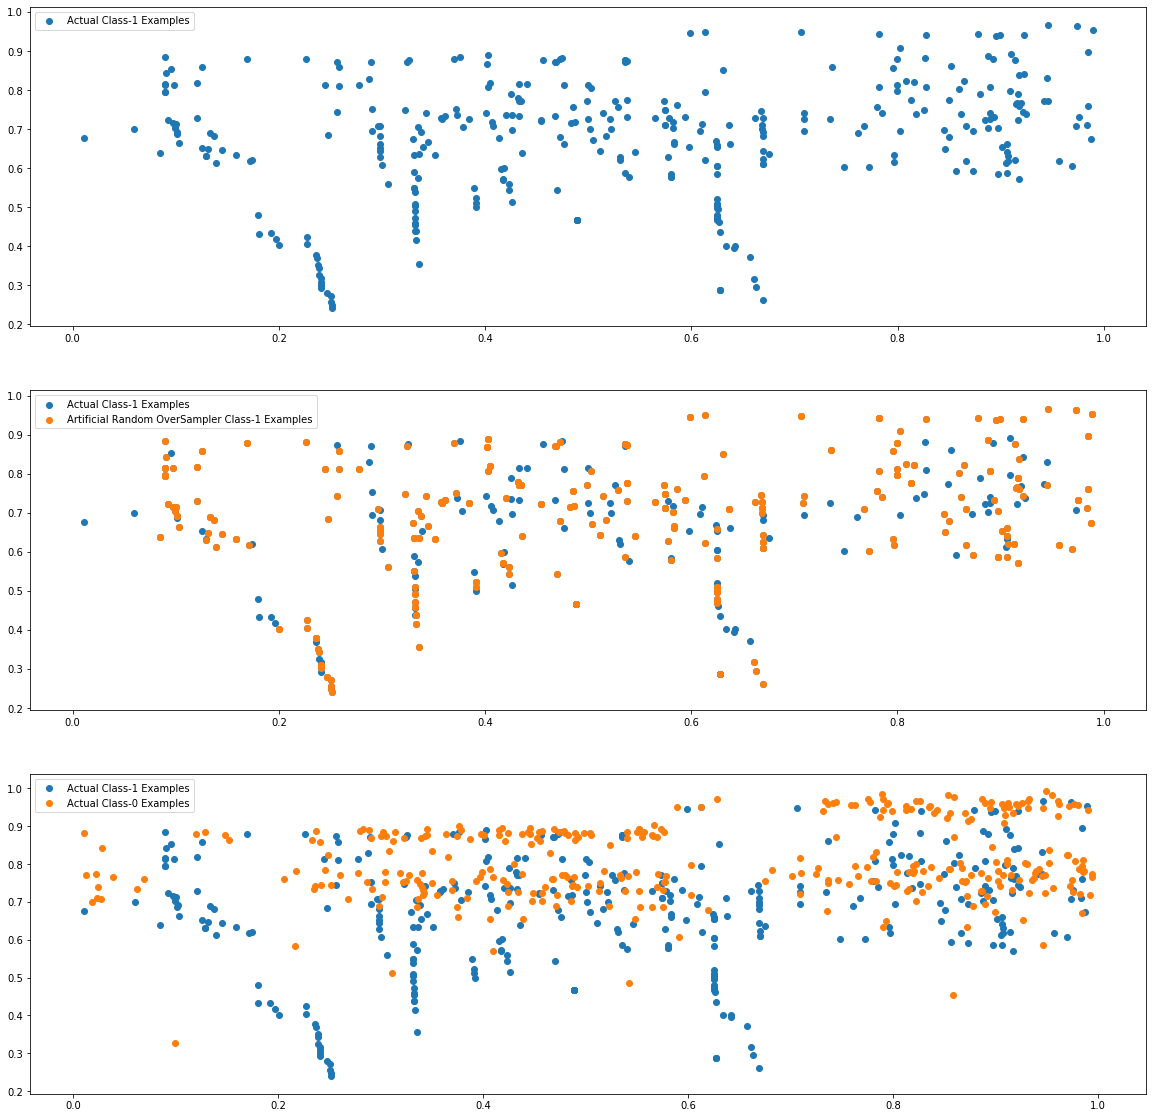

In [87]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_ros_1 = X_train_ros[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1[:X_train_1.shape[0], 0], X_train_ros_1[:X_train_1.shape[0], 1],
            label='Artificial Random OverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [88]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_ros.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ros.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros==0)))
print("After OverSampling, class event rate : {}% \n".format(round(sum(y_train_ros==1)/len(y_train_ros)*100,2)))

After OverSampling, the shape of train_X: (398032, 30)
After OverSampling, the shape of train_y: (398032,) 

After OverSampling, counts of label '1': 199016
After OverSampling, counts of label '0': 199016
After OverSampling, class event rate : 50.0% 



##### Logistic Regression

In [89]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr_ros = LogisticRegression()
model_lr_ros = model_lr_ros.fit(X_train_ros, y_train_ros)
#prediction on train data
prediction_train_logr_ros = model_lr_ros.predict(X_train)
#prediction on test data
prediction_test_logr_ros = model_lr_ros.predict(X_test)

In [90]:
print('Logistic Regression on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_logr_ros)))

Logistic Regression on train data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199016
           1       0.07      0.92      0.12       348

    accuracy                           0.98    199364
   macro avg       0.53      0.95      0.56    199364
weighted avg       1.00      0.98      0.99    199364




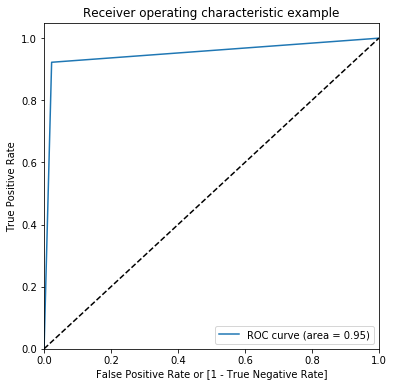

(array([0.        , 0.02255095, 1.        ]),
 array([0.        , 0.92241379, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [91]:
draw_roc(y_train, prediction_train_logr_ros)

In [93]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_logr_ros)))

ROC Score on Train Data 0.95


In [94]:
print('Logistic Regression on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_logr_ros)))

Logistic Regression on test data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85299
           1       0.06      0.90      0.12       144

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443




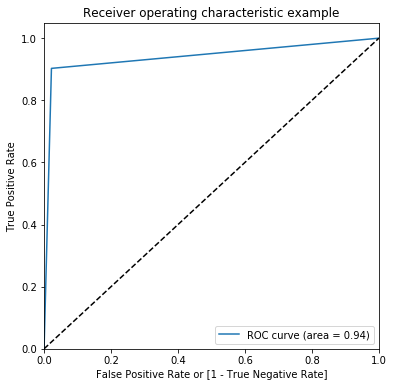

(array([0.        , 0.02200495, 1.        ]),
 array([0.        , 0.90277778, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [95]:
draw_roc(y_test, prediction_test_logr_ros)

In [96]:
# ROC AUC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_logr_ros)))

ROC Score on Test Data 0.94


#### KNN on Random Oversampler Data set

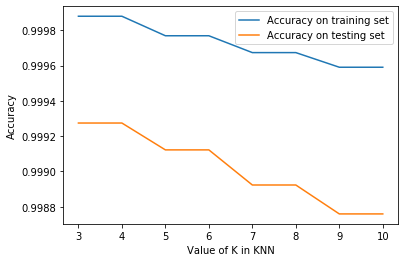

In [98]:
k_range = range(3, 11)
score1=[]
score2=[]
for k in k_range:
    knn_ros=KNeighborsClassifier(n_neighbors=k)
    knn_ros.fit(X_train_ros,y_train_ros)
    score1.append(knn_ros.score(X_train_ros,y_train_ros))
    score2.append(knn_ros.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [99]:
# Choosing n = 3
knn_ros=KNeighborsClassifier(n_neighbors=3)
knn_model_ros = knn_ros.fit(X_train_ros,y_train_ros)

In [100]:
prediction_train_knn_ros = knn_model_ros.predict(X_train)
print('KNN on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_knn_ros)))

KNN on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.88      1.00      0.94       348

    accuracy                           1.00    199364
   macro avg       0.94      1.00      0.97    199364
weighted avg       1.00      1.00      1.00    199364




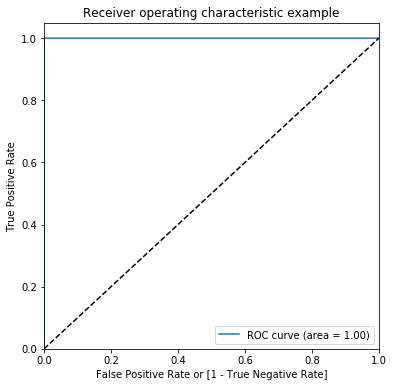

(array([0.00000000e+00, 2.41186638e-04, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [101]:
draw_roc(y_train, prediction_train_knn_ros)

In [103]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_knn_ros)))

ROC Score on Train Data 1.00


In [104]:
prediction_test_knn_ros = knn_model_ros.predict(X_test)
print('KNN on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_knn_ros)))

KNN on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.78      0.80      0.79       144

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443




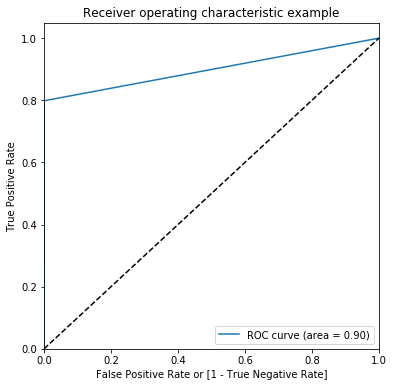

(array([0.00000000e+00, 3.86874406e-04, 1.00000000e+00]),
 array([0.        , 0.79861111, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [105]:
draw_roc(y_test, prediction_test_knn_ros)

In [106]:
# ROC AUC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_knn_ros)))

ROC Score on Test Data 0.90


#### Random Forest : 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  4.0min finished


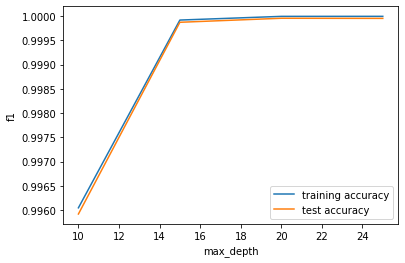

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Tuning max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf_ros = RandomForestClassifier()
rfgs_ros = GridSearchCV(rf_ros, parameters, 
                    cv=5,verbose = 1,
                    n_jobs=4,return_train_score=True)
rfgs_ros.fit(X_train_ros,y_train_ros)

plot_traintestAcc(rfgs_ros.cv_results_,'max_depth')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 25.7min finished


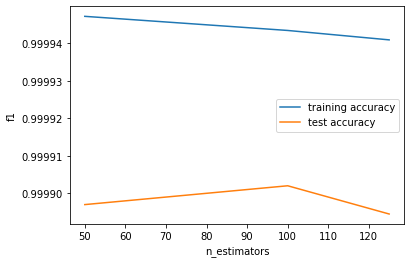

In [108]:
# Tuning n_estimator
parameters = {'n_estimators': range(50, 150, 25)}
rf1_ros = RandomForestClassifier(max_depth=15,random_state=10)
rfgs1_ros = GridSearchCV(rf1_ros,parameters,verbose = 1,
                    n_jobs=4,cv=5,return_train_score=True)
rfgs1_ros.fit(X_train_ros,y_train_ros)

plot_traintestAcc(rfgs1_ros.cv_results_,'n_estimators')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 82.2min finished


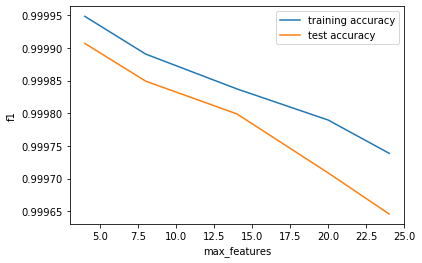

In [109]:
# Tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2_ros = RandomForestClassifier(max_depth=15,n_estimators=100,random_state=10)
rfgs2_ros = GridSearchCV(rf2_ros,parameters,verbose = 1,n_jobs=4,
                    cv=5,return_train_score=True)
rfgs2_ros.fit(X_train_ros,y_train_ros)

plot_traintestAcc(rfgs2_ros.cv_results_,'max_features')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 33.7min finished


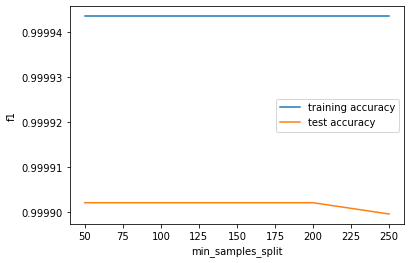

In [116]:
#Tuning min_samples_split
parameters = {'min_samples_split': range (50,300,50)}
rf4_ros = RandomForestClassifier(max_depth=15,n_estimators=100,max_features=5,random_state=10)
rfgs4_ros = GridSearchCV(rf4_ros,parameters,verbose = 1,n_jobs=4,
                    cv=5,return_train_score=True)
rfgs4_ros.fit(X_train_ros,y_train_ros)

plot_traintestAcc(rfgs4_ros.cv_results_,'min_samples_split')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 47.7min finished


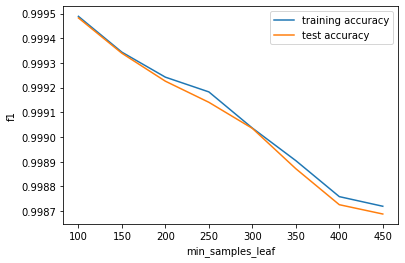

In [117]:
#Tuning min_samples_leaf
parameters = {'min_samples_leaf': range (100,500,50)}
rf3_ros = RandomForestClassifier(max_depth=15,n_estimators=100,max_features=5,min_samples_split=200,random_state=10)
rfgs3_ros = GridSearchCV(rf3_ros,parameters,verbose = 1,n_jobs=4, 
                    cv=5,return_train_score=True)
rfgs3_ros.fit(X_train_ros,y_train_ros)

plot_traintestAcc(rfgs3_ros.cv_results_,'min_samples_leaf')

In [118]:
# Tunned Random Forest
model_rf_ros = RandomForestClassifier(max_depth=15,
                                  n_estimators=100,
                                  max_features=5,
                                  min_samples_leaf=400,
                                  min_samples_split=200,
                                  random_state=200)
model_rf_ros.fit(X_train_ros, y_train_ros)
# Make predictions on Train Data
prediction_train_rf_ros = model_rf_ros.predict(X_train)
# Make predictions on Test Data
prediction_test_rf_ros = model_rf_ros.predict(X_test)

In [119]:
print('Random Forest on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_rf_ros)))

Random Forest on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.47      1.00      0.64       348

    accuracy                           1.00    199364
   macro avg       0.74      1.00      0.82    199364
weighted avg       1.00      1.00      1.00    199364




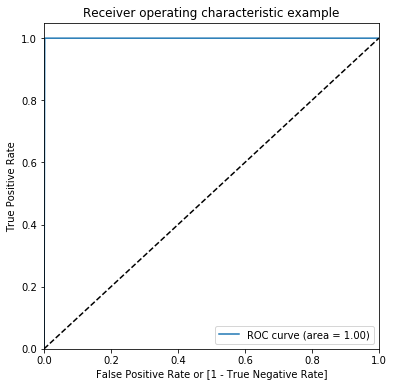

(array([0.        , 0.00193452, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [120]:
draw_roc(y_train, prediction_train_rf_ros)

In [122]:
# ROC AUC Score.
print("ROC Score on Train Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_rf_ros)))

ROC Score on Train Data 1.00


In [123]:
print('Random Forest on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_rf_ros)))

Random Forest on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.43      0.86      0.57       144

    accuracy                           1.00     85443
   macro avg       0.71      0.93      0.79     85443
weighted avg       1.00      1.00      1.00     85443




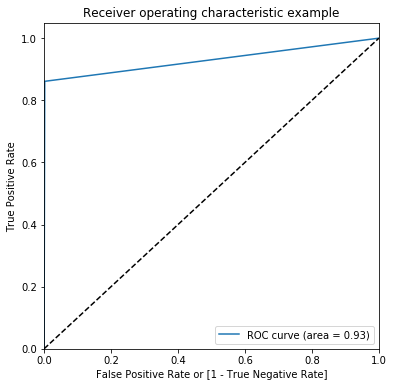

(array([0.        , 0.00193437, 1.        ]),
 array([0.        , 0.86111111, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [124]:
draw_roc(y_test, prediction_test_rf_ros)

In [125]:
# ROC AUC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_rf_ros)))

ROC Score on Test Data 0.93


#### XGBoost on Random Oversampler Data Set.

In [126]:
from xgboost import XGBClassifier

# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch_rf_ros = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch_rf_ros.fit(X_train_ros, y_train_ros)
gsearch_rf_ros.best_params_, gsearch_rf_ros.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.99999000663739)

In [127]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2_ros = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch2_ros.fit(X_train_ros, y_train_ros)
gsearch2_ros.best_params_, gsearch2_ros.best_score_

({'gamma': 0.0}, 0.99999000663739)

In [128]:
# Final XgBoost Algorithm

model_xgboost_ros = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
model_xgboost_ros.fit(X_train_ros,y_train_ros)
X_train_xg = X_train.as_matrix()
X_test_xg = X_test.as_matrix()
# prediction on train data
prediction_train_xgboost_ros = model_xgboost_ros.predict(X_train_xg)
#prediction on test data
prediction_test_xgboost_ros = model_xgboost_ros.predict(X_test_xg)

In [130]:
print('XGBoost on train data:\n {}\n'.format(metrics.classification_report(y_train, prediction_train_xgboost_ros)))

XGBoost on train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.99      1.00      0.99       348

    accuracy                           1.00    199364
   macro avg       0.99      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364




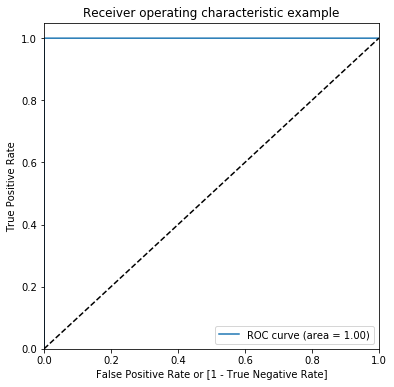

(array([0.00000000e+00, 2.00988865e-05, 1.00000000e+00]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [132]:
draw_roc(y_train, prediction_train_xgboost_ros)

In [133]:
# ROC AUC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_train, prediction_train_xgboost_ros)))

ROC Score on Test Data 1.00


In [134]:
print('XGBoost on test data:\n {}\n'.format(metrics.classification_report(y_test, prediction_test_xgboost_ros)))

XGBoost on test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.91      0.83      0.87       144

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443




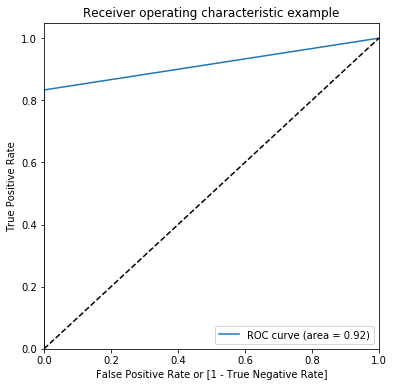

(array([0.00000000e+00, 1.40681602e-04, 1.00000000e+00]),
 array([0.        , 0.83333333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [135]:
draw_roc(y_test, prediction_test_xgboost_ros)

In [136]:
# ROC AUC Score.
print("ROC Score on Test Data {:2.2f}".format(metrics.roc_auc_score(y_test, prediction_test_xgboost_ros)))

ROC Score on Test Data 0.92


#### Model Performance based on AUC Score on the Random Oversampler dataset:
| Model/Metrics | Train | Test |
| --- | --- | --- |
| Logistic Regression| 0.95 | 0.94 |
| KNN| 1 | 0.90 |
| Random Forest| 1 | 0.93 |
| XG Boost| 1 | 0.92 |

We are selecting XG Boost as final model here as with higher Auc score and Precision for the test Data.

In [138]:
# To get the weights of all the variables
importances_xgboost_ros = model_xgboost_ros.feature_importances_
weights_xgboost_ros = pd.Series(importances_xgboost_ros,
                 index=X.columns.values)

Text(0.5, 1.0, 'Important Coefficients in the Xg Boost Model')

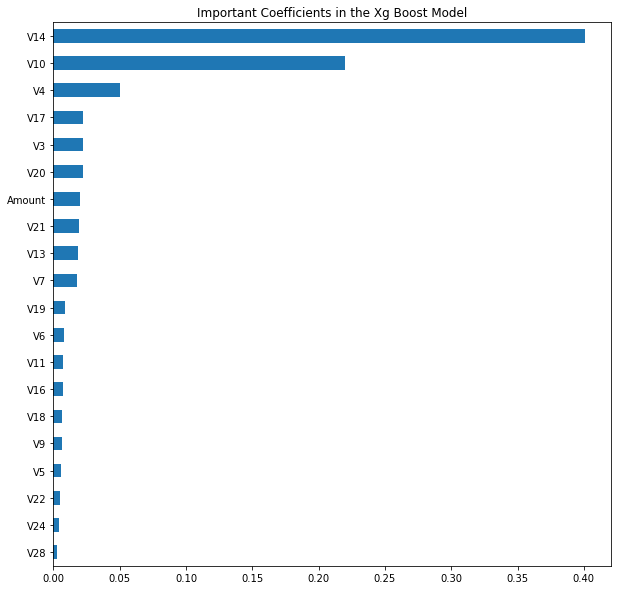

In [139]:
imp_coef_xgboost_ros = pd.concat([weights_xgboost_ros.sort_values().head(10),
                     weights_xgboost_ros.sort_values().tail(10)])
fig = plt.figure(figsize = (10,10))
imp_coef_xgboost_ros.plot(kind = "barh")
plt.title("Important Coefficients in the Xg Boost Model")

### Selecting the oversampling method which shows the best result on a model
| Over Sampling | Model | Test AUC Score | Test Precision Score on 1 | Test Recall Score on 1 |
| --- | --- | --- | --- | --- |
| UN BALANCED Data Set| XG Boost | 0.90 | 0.91 | 0.79 |
| SMOTE Data Set| XG Boost | 0.93 | 0.79 | 0.85 |
| ADASYN Data Set| XG Boost | 0.92 |0.76 | 0.85 |
| RANDOM OVERSAMPLER Data Set| XG Boost | 0.92 | 0.91 | 0.83 |

From the above performance matrix, we are selecting Random OverSampler method for over sampling and Xg Boost as model for this assignment data set for Credi card Fraud detection.

Also, giving importance to Precision score in the test data set for predicting 1 as and fraudent transaction would be greater loss to the bank.

### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 5


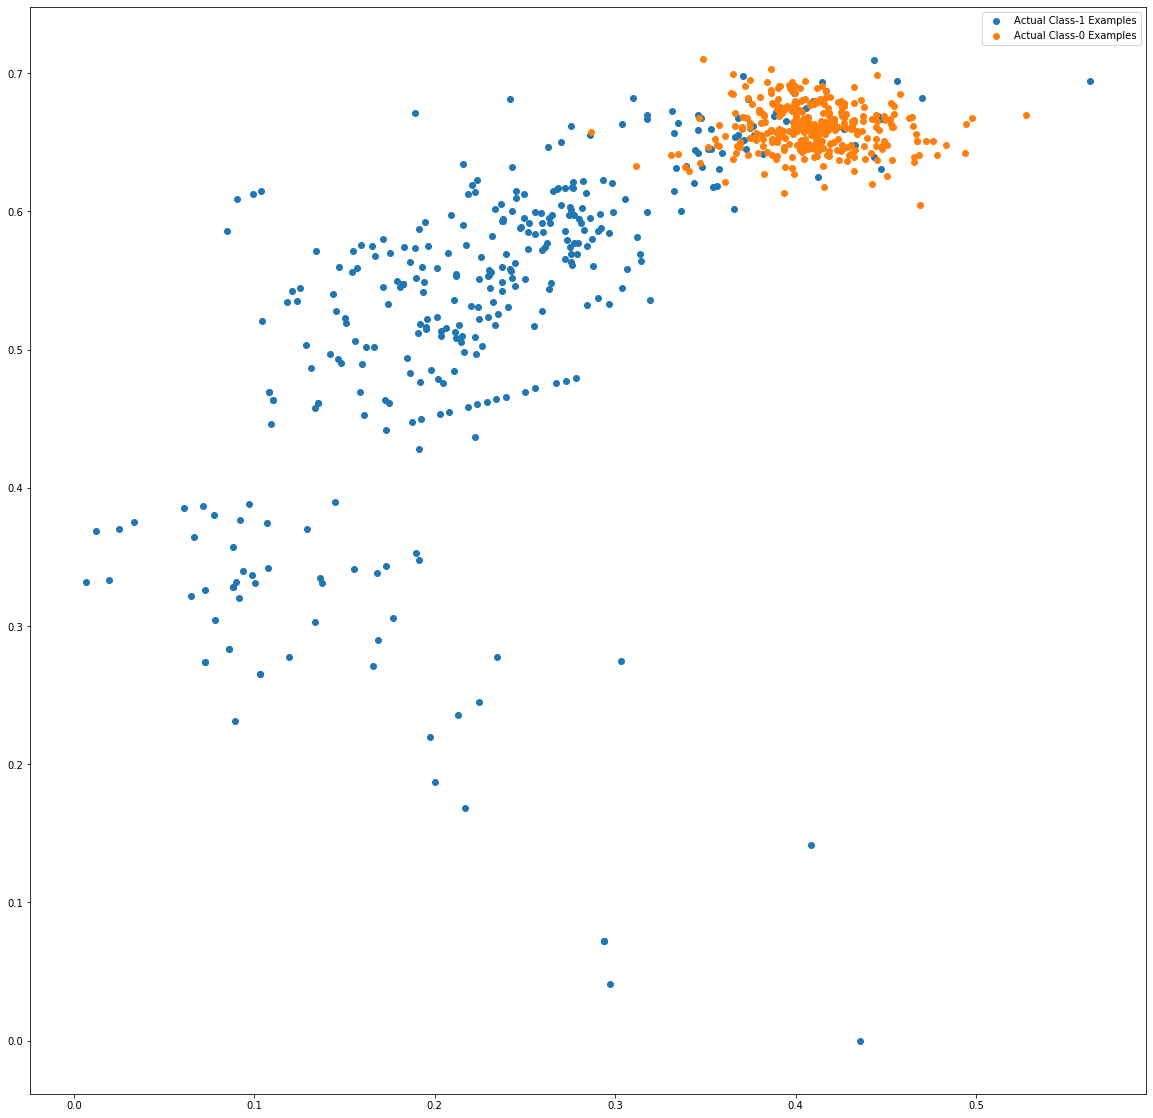

In [140]:
var_imp = []
for i in model_xgboost_ros.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(model_xgboost_ros.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(model_xgboost_ros.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(model_xgboost_ros.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(model_xgboost_ros.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(model_xgboost_ros.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [144]:
print('Train auc =', metrics.roc_auc_score(y_train, prediction_train_xgboost_ros))
fpr, tpr, thresholds = metrics.roc_curve(y_train, prediction_train_xgboost_ros, pos_label=1)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Train FPR = ',fpr)
print('Train TPR = ',tpr)
print('Train threshold = ',threshold)

Train auc = 0.9999899505567392
Train FPR =  [0.00000000e+00 2.00988865e-05 1.00000000e+00]
Train TPR =  [0. 1. 1.]
Train threshold =  1
